In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.cluster import Birch
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import scipy.stats as stats
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import mean_absolute_error

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
df = pd.read_csv('CensusCanada2016Training.csv')
data = pd.read_csv("CensusCanada2016Training.csv")
df

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,4051,1441,68242.12,1441,323,199,53,182,526,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,914,505,0,1348,1186,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2588,953,108823.38,953,0,3,31,501,276,926,27,0,875,847,28
4996,9036,3859,68735.64,3859,678,986,386,359,448,2388,1436,35,3649,2602,1047
4997,4689,1895,71370.58,1895,164,485,511,523,29,677,1038,180,1764,1219,545
4998,3673,1038,58258.26,1038,544,185,40,95,13,796,242,0,893,546,347


# Part a

The number of Total Households For Period Of Construction is larger than the sum of total households for each period of construction. Hence an additional column "Total Households For Period Of Construction Built After 2005" is being created to include the rest of number of households.

In [3]:
df["Total Households For Period Of Construction Built After 2005"] = df["Total Households For Period Of Construction"] - df["Total Households For Period Of Construction Built Before 1961"] - df["Total Households For Period Of Construction Built Between 1961 And 1980"] - df["Total Households For Period Of Construction Built Between 1981 And 190"] - df["Total Households For Period Of Construction Built Between 1991 And 2000"] - df["Total Households For Period Of Construction Built Between 2001 And 2005"]
cols = df.columns.tolist()
cols = cols[:9] + cols[-1:] + cols[9:-1]
df = df[cols]

Dropping rows with 0 values.

In [4]:
df = df[(df.T != 0).any()]
df = df[df['Median Household Income (Current Year $)']!=0]
data = data[(data.T != 0).any()]
data = data[data['Median Household Income (Current Year $)']!=0]
df

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,4051,1441,68242.12,1441,323,199,53,182,526,158,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,11,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,137,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,48,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,204,914,505,0,1348,1186,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2588,953,108823.38,953,0,3,31,501,276,142,926,27,0,875,847,28
4996,9036,3859,68735.64,3859,678,986,386,359,448,1002,2388,1436,35,3649,2602,1047
4997,4689,1895,71370.58,1895,164,485,511,523,29,183,677,1038,180,1764,1219,545
4998,3673,1038,58258.26,1038,544,185,40,95,13,161,796,242,0,893,546,347


Summarize all the input values.

In [5]:
df.describe()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,4886.455622,1935.518273,77551.276643,1935.518273,388.062851,557.668474,261.528514,238.883735,139.152209,350.222490,1139.349197,780.309639,15.859438,1818.227711,1186.959237,630.678514
std,2477.749372,969.064733,33076.778994,969.064733,417.023218,447.840387,257.854489,265.536340,222.079909,626.877747,810.524130,891.444026,63.067512,892.360065,707.972940,594.149831
min,2.000000,1.000000,11334.980000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3305.000000,1341.000000,53201.355000,1341.000000,49.000000,195.000000,74.000000,58.000000,17.000000,60.000000,541.750000,148.000000,0.000000,1263.000000,692.750000,202.750000
50%,4663.500000,1827.000000,76328.300000,1827.000000,241.000000,472.500000,181.500000,144.000000,52.000000,144.000000,1078.000000,490.000000,2.000000,1728.000000,1114.000000,458.000000
75%,6242.500000,2433.000000,95554.435000,2433.000000,615.000000,831.250000,369.250000,326.000000,158.000000,368.250000,1593.250000,1120.250000,6.000000,2284.000000,1571.250000,880.250000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.000000,2360.000000,2262.000000,12039.000000,9123.000000,15248.000000,1378.000000,11891.000000,8628.000000,6813.000000


Dropping the 'Total Households For Period Of Construction' column as it contains the same value as the 'Total Households'.

In [6]:
df = df.drop(columns='Total Households For Period Of Construction')
df

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,4051,1441,68242.12,323,199,53,182,526,158,911,525,5,1343,919,424
1,2329,1026,88172.37,927,70,15,3,0,11,792,230,4,991,778,213
2,5276,2071,103853.38,3,607,567,651,106,137,1418,652,1,1903,1522,381
3,5967,2203,82796.63,133,1695,248,79,0,48,1397,806,0,2079,1272,807
4,4236,1419,91648.22,0,7,127,938,143,204,914,505,0,1348,1186,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2588,953,108823.38,0,3,31,501,276,142,926,27,0,875,847,28
4996,9036,3859,68735.64,678,986,386,359,448,1002,2388,1436,35,3649,2602,1047
4997,4689,1895,71370.58,164,485,511,523,29,183,677,1038,180,1764,1219,545
4998,3673,1038,58258.26,544,185,40,95,13,161,796,242,0,893,546,347


Since the Total Households For Period Of Construction columns, Total Households For Structure Type and Dwellings by Tenure Owner/Renter are positively correlated to the total number of households. The larger the number of total households, the larger those number will be. It will not provide a meaningful analysis in the correlation matrix with Median Household Income variable. Hence we created new columns with percentage value for those columns. 

In [7]:
df['Dwellings by Tenure Renter %'] = df['Dwellings by Tenure Renter'] / df['Total Households for Tenure']
df['Dwellings by Tenure Owner %'] = df['Dwellings by Tenure Owner'] / df['Total Households for Tenure']
df["Total Households For Structure Type Houses %"] = df["Total Households For Structure Type Houses"] / df["Total Households"]
df["Total Households For Structure Type Apartment, Building Low And High Rise %"] = df["Total Households For Structure Type Apartment, Building Low And High Rise"] / df["Total Households"]
df["Total Households For Structure Type Other Dwelling Types %"] = df["Total Households For Structure Type Other Dwelling Types"] / df["Total Households"]
df.describe()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4971.000000,4971.000000,4980.000000,4980.000000,4980.000000
mean,4886.455622,1935.518273,77551.276643,388.062851,557.668474,261.528514,238.883735,139.152209,350.222490,1139.349197,780.309639,15.859438,1818.227711,1186.959237,630.678514,0.333817,0.661754,0.617409,0.371779,0.010813
std,2477.749372,969.064733,33076.778994,417.023218,447.840387,257.854489,265.536340,222.079909,626.877747,810.524130,891.444026,63.067512,892.360065,707.972940,594.149831,0.235090,0.236525,0.312412,0.314989,0.045797
min,2.000000,1.000000,11334.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3305.000000,1341.000000,53201.355000,49.000000,195.000000,74.000000,58.000000,17.000000,60.000000,541.750000,148.000000,0.000000,1263.000000,692.750000,202.750000,0.136364,0.497621,0.385526,0.095795,0.000000
50%,4663.500000,1827.000000,76328.300000,241.000000,472.500000,181.500000,144.000000,52.000000,144.000000,1078.000000,490.000000,2.000000,1728.000000,1114.000000,458.000000,0.274246,0.719517,0.702263,0.281993,0.000804
75%,6242.500000,2433.000000,95554.435000,615.000000,831.250000,369.250000,326.000000,158.000000,368.250000,1593.250000,1120.250000,6.000000,2284.000000,1571.250000,880.250000,0.494791,0.861268,0.887081,0.606145,0.004346
max,30789.000000,15388.000000,669559.560000,2411.000000,3547.000000,1740.000000,2360.000000,2262.000000,12039.000000,9123.000000,15248.000000,1378.000000,11891.000000,8628.000000,6813.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since the 'Dwellings by Tenure Owner', 'Dwellings by Tenure Renter', 'Total Households For Structure Type Houses', 'Total Households For Structure Type Apartment, Building Low And High Rise', 'Total Households For Structure Type Other Dwelling Types' columns could be computed using 'Total Households' and 'Total Households for Tenure'. We exluded those columns.

In [8]:
df['Estimated Family Size'] = df['Total Population'] / df['Total Households']
df = df.drop(columns=['Dwellings by Tenure Owner', 'Dwellings by Tenure Renter', 'Total Households For Structure Type Houses', 'Total Households For Structure Type Apartment, Building Low And High Rise', 'Total Households For Structure Type Other Dwelling Types'])
df

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size
0,4051,1441,68242.12,323,199,53,182,526,158,1343,0.315711,0.684289,0.632200,0.364330,0.003470,2.811242
1,2329,1026,88172.37,927,70,15,3,0,11,991,0.214934,0.785066,0.771930,0.224172,0.003899,2.269981
2,5276,2071,103853.38,3,607,567,651,106,137,1903,0.200210,0.799790,0.684693,0.314824,0.000483,2.547562
3,5967,2203,82796.63,133,1695,248,79,0,48,2079,0.388167,0.611833,0.634135,0.365865,0.000000,2.708579
4,4236,1419,91648.22,0,7,127,938,143,204,1348,0.120178,0.879822,0.644116,0.355884,0.000000,2.985201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2588,953,108823.38,0,3,31,501,276,142,875,0.032000,0.968000,0.971668,0.028332,0.000000,2.715635
4996,9036,3859,68735.64,678,986,386,359,448,1002,3649,0.286928,0.713072,0.618813,0.372117,0.009070,2.341539
4997,4689,1895,71370.58,164,485,511,523,29,183,1764,0.308957,0.691043,0.357256,0.547757,0.094987,2.474406
4998,3673,1038,58258.26,544,185,40,95,13,161,893,0.388578,0.611422,0.766859,0.233141,0.000000,3.538536


The calculated percentages contain 'NAN' because dividing zero.
The estimated family size has 'inf' because dividing zero.

In [9]:
df = df.fillna(0)
df = df.replace(np.inf, 0)

# Part b

Create a correlation matrix.

In [10]:
df.corr()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size
Total Population,1.000000,0.896843,0.158442,-0.012296,0.244853,0.345996,0.460170,0.524040,0.696761,0.891410,-0.143615,0.185773,0.082891,-0.064833,-0.119537,0.100457
Total Households,0.896843,1.000000,-0.037305,0.180384,0.395168,0.360287,0.410403,0.432530,0.668286,0.995613,0.115217,-0.068057,-0.183875,0.198980,-0.114241,-0.114159
Median Household Income (Current Year $),0.158442,-0.037305,1.000000,-0.309698,-0.259138,0.071959,0.187712,0.226822,0.144017,-0.044493,-0.644521,0.644504,0.587311,-0.581993,-0.003530,0.260429
Total Households For Period Of Construction Built Before 1961,-0.012296,0.180384,-0.309698,1.000000,0.145225,-0.229918,-0.291600,-0.271465,-0.175879,0.196007,0.444295,-0.415524,-0.368957,0.379141,-0.090808,-0.263088
Total Households For Period Of Construction Built Between 1961 And 1980,0.244853,0.395168,-0.259138,0.145225,1.000000,0.224071,-0.128702,-0.245794,-0.150708,0.417529,0.300409,-0.266749,-0.237576,0.246087,-0.071910,-0.173561
Total Households For Period Of Construction Built Between 1981 And 190,0.345996,0.360287,0.071959,-0.229918,0.224071,1.000000,0.349075,-0.012713,-0.004864,0.369494,-0.089230,0.110305,0.017562,-0.009928,-0.051515,0.003295
Total Households For Period Of Construction Built Between 1991 And 2000,0.460170,0.410403,0.187712,-0.291600,-0.128702,0.349075,1.000000,0.430698,0.200601,0.410315,-0.225878,0.241415,0.113191,-0.107968,-0.029555,0.085100
Total Households For Period Of Construction Built Between 2001 And 2005,0.524040,0.432530,0.226822,-0.271465,-0.245794,-0.012713,0.430698,1.000000,0.493342,0.419993,-0.236334,0.246871,0.145354,-0.139239,-0.033877,0.132461
Total Households For Period Of Construction Built After 2005,0.696761,0.668286,0.144017,-0.175879,-0.150708,-0.004864,0.200601,0.493342,1.000000,0.635828,-0.115959,0.126692,0.024260,-0.021284,-0.019109,0.038205
Total Households for Tenure,0.891410,0.995613,-0.044493,0.196007,0.417529,0.369494,0.410315,0.419993,0.635828,1.000000,0.118230,-0.066343,-0.183963,0.199108,-0.114523,-0.120538


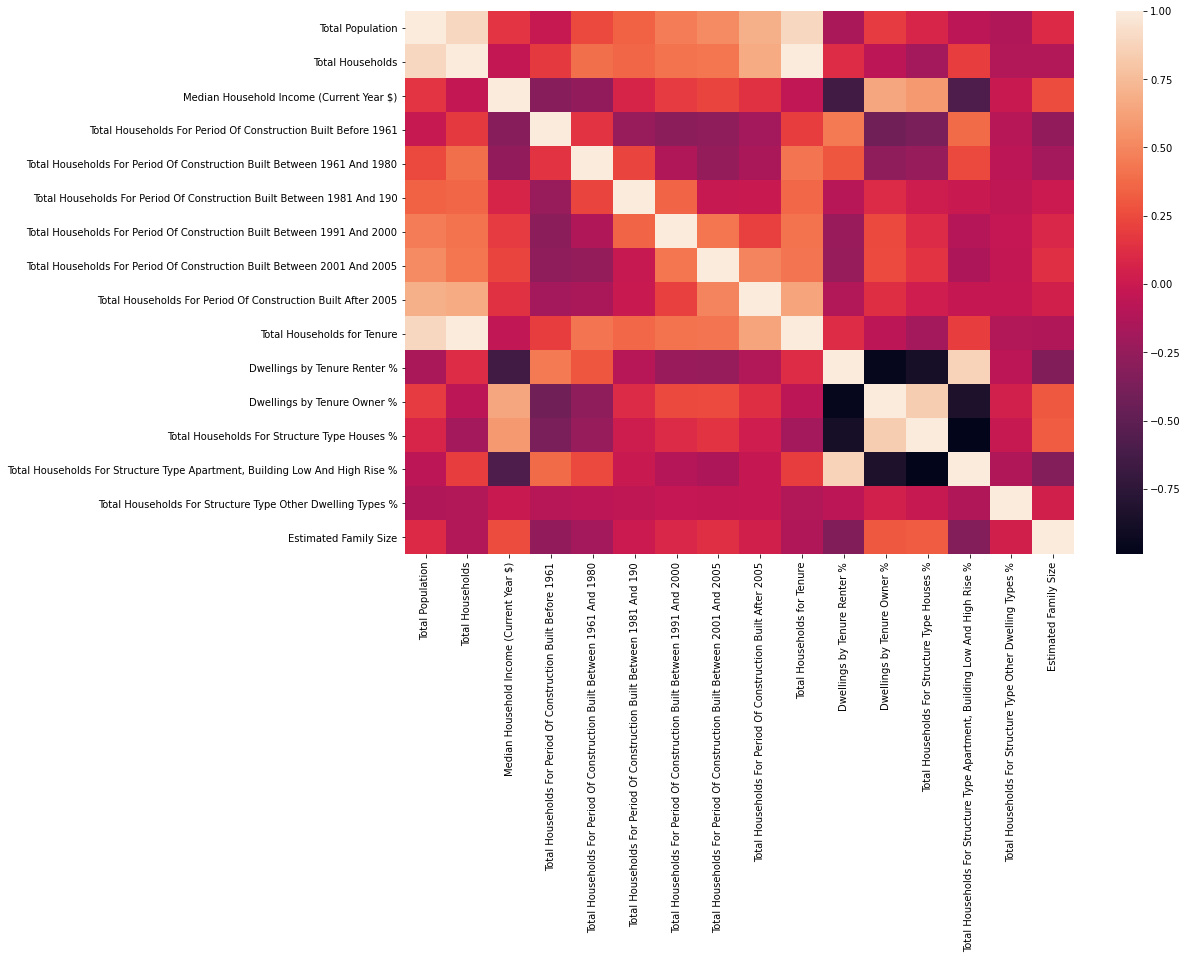

In [11]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data = df.corr())

There is a positive relationship between 'Median Household Income (Current Year $)' and 'Dwellings by Tenure Owner %'. 

There is a negative relationship between 'Median Household Income (Current Year $)' and 'Total Households For Structure Type Houses %'. 

It suggests that people tend to buy a tenure instead of renting a tenure when they have a higher income. 

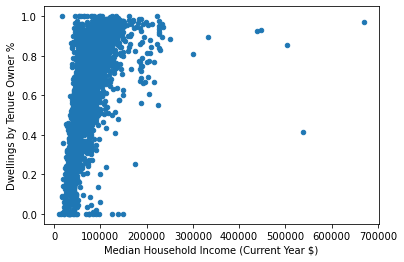

In [12]:
ax1 = df.plot.scatter(x='Median Household Income (Current Year $)', y='Dwellings by Tenure Owner %')

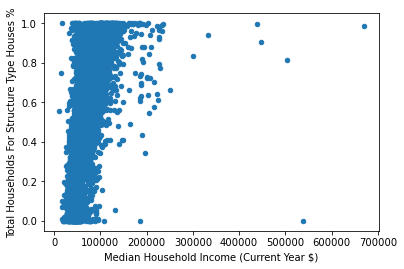

In [13]:
ax2 = df.plot.scatter(x='Median Household Income (Current Year $)', y='Total Households For Structure Type Houses %')

There is a positive relationship between 'Median Household Income (Current Year $)' and 'Total Households For Structure Type Houses %'.

There is a positive relationship between 'Median Household Income (Current Year $)' and 'Total Households For Structure Type Apartment, Building Low And High Rise %'.

It suggests that people tend to live in houses in the higher income area, which means that people may live as a family  in such area and film genre such as Comedy may be popular. Also since there maybe kids living in those area, facilities like arcades may bring additional revenue to cinemas.

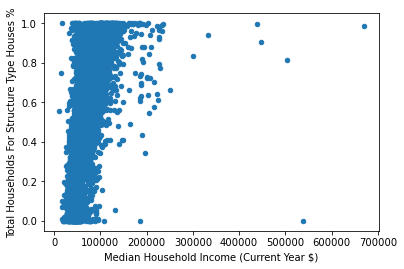

In [14]:
ax3 = df.plot.scatter(x='Median Household Income (Current Year $)', y='Total Households For Structure Type Houses %')


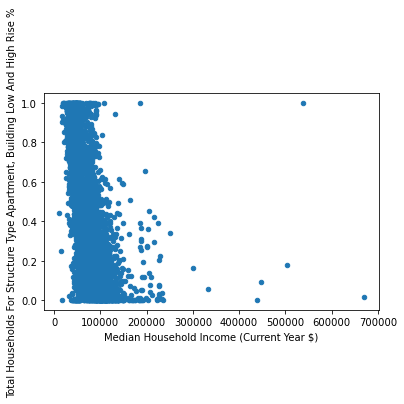

In [15]:
ax4 = df.plot.scatter(x='Median Household Income (Current Year $)', y='Total Households For Structure Type Apartment, Building Low And High Rise %')


# Part C

In [16]:
seed = 42
test_size = 0.2
df_train, df_test = train_test_split(df, test_size = test_size, random_state=seed)

In [17]:
#Try different values of k
from sklearn.cluster import KMeans
ks = range(1,12)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(df_train)
    inertias.append(model.inertia_)

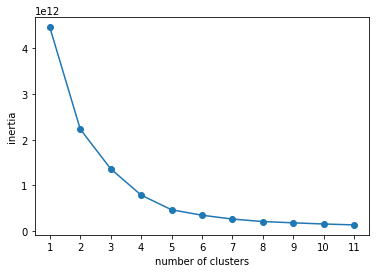

In [18]:
#Plot inertias for various values of k
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
## Optimal model 
optimal_k = 5
optimal_model = KMeans(n_clusters = optimal_k)
optimal_model.fit(df_train)
labels = optimal_model.predict(df_train)
centroids = optimal_model.cluster_centers_

# Part D

In [20]:
df_temp = df_train
df_temp['label'] = labels
df_label1 = df_temp[df_temp['label']==0].drop(columns='label')
df_label2 = df_temp[df_temp['label']==1].drop(columns='label')
df_label3 = df_temp[df_temp['label']==2].drop(columns='label')
df_label4 = df_temp[df_temp['label']==3].drop(columns='label')
df_label5 = df_temp[df_temp['label']==4].drop(columns='label')
df_temp

<ipython-input-20-acbaec40d7b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label'] = labels


,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size,label
3960,5587,2320,77099.82,1679,515,64,0,3,59,2191,0.320858,0.679142,0.672845,0.327155,0.000000,2.408190,3
1661,3687,1373,85904.25,72,1201,60,3,10,27,1318,0.166161,0.833839,0.843409,0.156591,0.000000,2.685361,3
1618,2832,1715,53474.03,343,83,21,34,129,1105,1510,0.566225,0.433775,0.000000,1.000000,0.000000,1.651312,0
167,13863,5267,106133.39,154,589,568,432,418,3106,4835,0.198139,0.801861,0.659199,0.340801,0.000000,2.632049,1
2501,3998,1856,54544.39,929,459,210,108,31,119,1768,0.546380,0.453620,0.373384,0.624461,0.002155,2.154095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,501,182,43524.27,3,11,16,21,21,110,145,0.434483,0.020690,0.791209,0.142857,0.065934,2.752747,0
468,2935,1507,43139.86,914,331,99,52,14,97,1405,0.750890,0.249110,0.010617,0.948242,0.041141,1.947578,0
3108,8035,3860,53565.34,23,817,410,960,192,1458,3649,0.185256,0.810633,0.485492,0.157513,0.356995,2.081606,0
3788,1368,539,35899.55,396,119,12,3,3,6,533,0.645403,0.354597,0.296846,0.703154,0.000000,2.538033,0


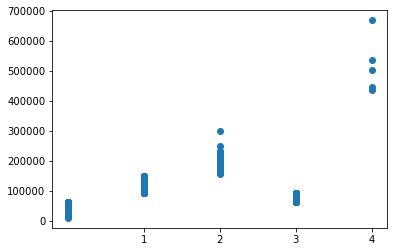

In [21]:
x = df_temp['label']
y = df_temp['Median Household Income (Current Year $)']
plt.scatter(x,y)
plt.xticks(range(1,5))
plt.show()

In [22]:
max = df_temp.groupby(['label'], as_index=False)['Median Household Income (Current Year $)'].max()
max

,label,Median Household Income (Current Year $)
0,0,64441.78
1,1,151853.27
2,2,301209.74
3,3,95541.80
4,4,669559.56


In [23]:
min = df_temp.groupby(['label'], as_index=False)['Median Household Income (Current Year $)'].min()
min

,label,Median Household Income (Current Year $)
0,0,11334.98
1,1,95530.85
2,2,157298.85
3,3,64473.07
4,4,437853.93


In [24]:
centorids_x = centroids[:,2]
centorids_x

array([ 48130.86025418, 110347.76084477, 195999.75510204,  80692.65715054,
       519148.64      ])

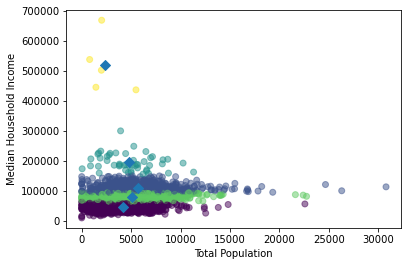

In [25]:
x = df_train['Total Population']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Population')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 0]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

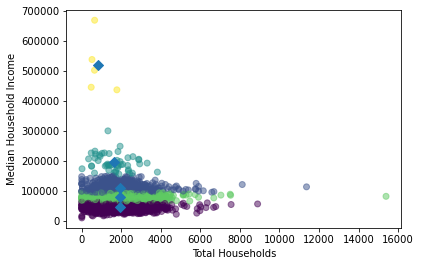

In [26]:
x = df_train['Total Households']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households')
plt.ylabel('Median Household Income')
centorids_x = centroids[:,1]
centorids_y = centroids[:,2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

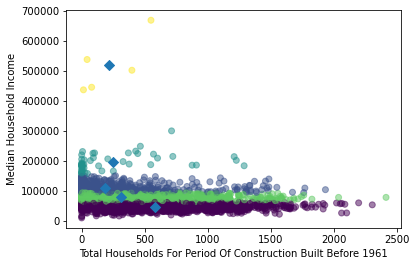

In [27]:
x = df_train['Total Households For Period Of Construction Built Before 1961']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Before 1961')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 3]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

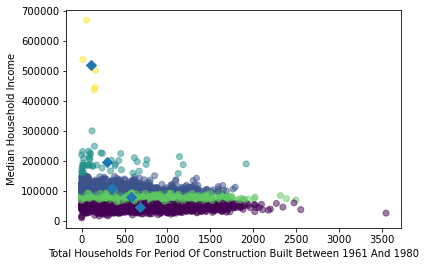

In [28]:
x = df_train['Total Households For Period Of Construction Built Between 1961 And 1980']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1961 And 1980')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 4]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

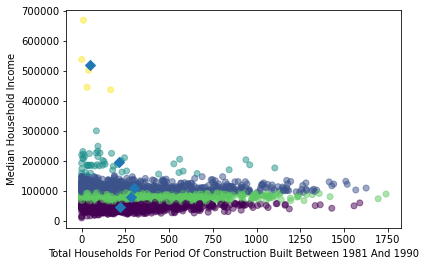

In [29]:
x = df_train['Total Households For Period Of Construction Built Between 1981 And 190']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1981 And 1990')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 5]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

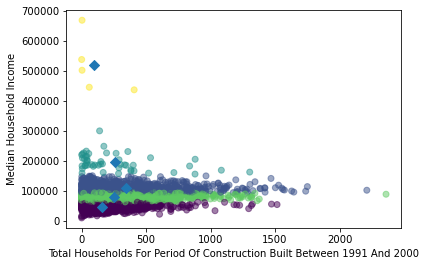

In [30]:
x = df_train['Total Households For Period Of Construction Built Between 1991 And 2000']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1991 And 2000')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 6]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

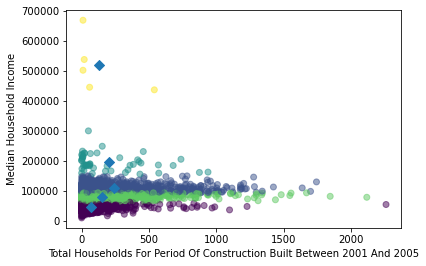

In [31]:
x = df_train['Total Households For Period Of Construction Built Between 2001 And 2005']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 2001 And 2005')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 7]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

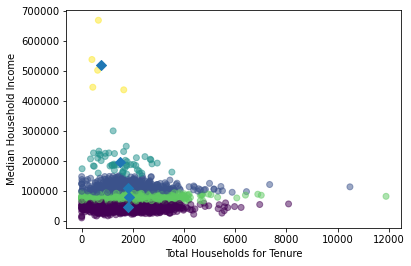

In [32]:
x = df_train['Total Households for Tenure']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households for Tenure')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 9]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

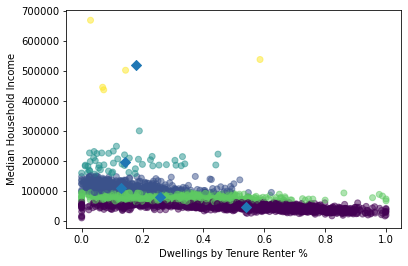

In [33]:
x = df_train['Dwellings by Tenure Renter %']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Dwellings by Tenure Renter %')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 10]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

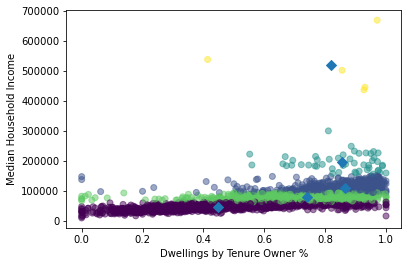

In [34]:
x = df_train['Dwellings by Tenure Owner %']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Dwellings by Tenure Owner %')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 11]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

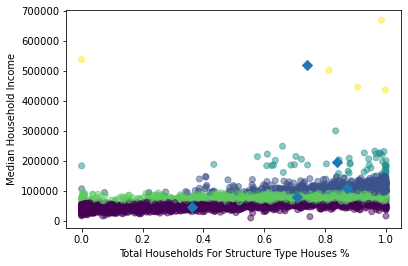

In [35]:
x = df_train['Total Households For Structure Type Houses %']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Houses %')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 12]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

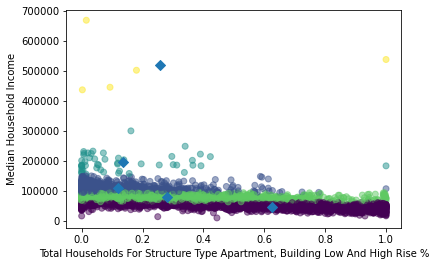

In [36]:
x = df_train['Total Households For Structure Type Apartment, Building Low And High Rise %']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Apartment, Building Low And High Rise %')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 13]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

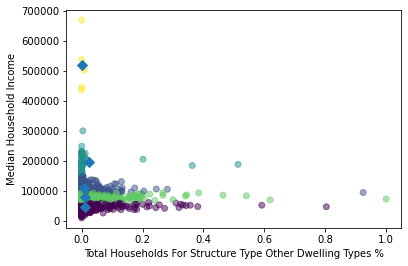

In [37]:
x = df_train['Total Households For Structure Type Other Dwelling Types %']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Other Dwelling Types %')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 14]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

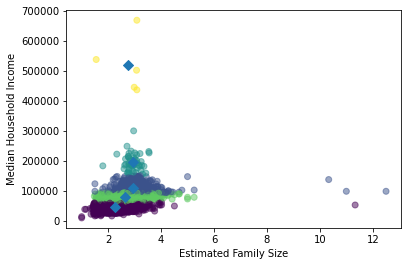

In [38]:
x = df_train['Estimated Family Size']
y = df_train['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Estimated Family Size')
plt.ylabel('Median Household Income')
centorids_x = centroids[:, 15]
centorids_y = centroids[:, 2]
plt.scatter(centorids_x, centorids_y, marker = 'D', s = 50)
plt.show()

# Part D

In [39]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [40]:
brc = Birch(n_clusters=5,threshold=0.4)
brc.fit(df_scaled)

Birch(n_clusters=5, threshold=0.4)

In [41]:
labels = brc.predict(df_scaled)
np.unique(labels)
#brc.subcluster_centers_

array([0, 1, 2, 3, 4], dtype=int64)

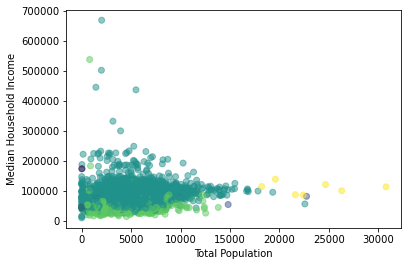

In [42]:
x = df['Total Population']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Population')
plt.ylabel('Median Household Income')
plt.show()

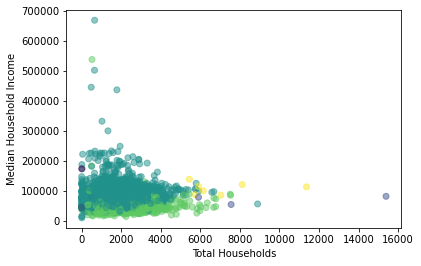

In [43]:
x = df['Total Households']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households')
plt.ylabel('Median Household Income')
plt.show()

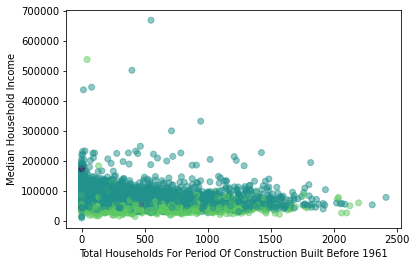

In [44]:
x = df['Total Households For Period Of Construction Built Before 1961']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Before 1961')
plt.ylabel('Median Household Income')
plt.show()

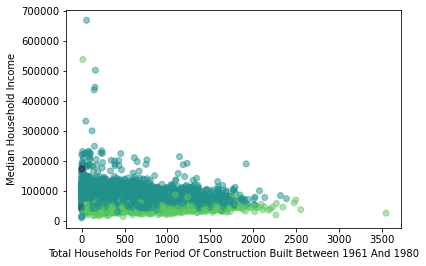

In [45]:
x = df['Total Households For Period Of Construction Built Between 1961 And 1980']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1961 And 1980')
plt.ylabel('Median Household Income')
plt.show()

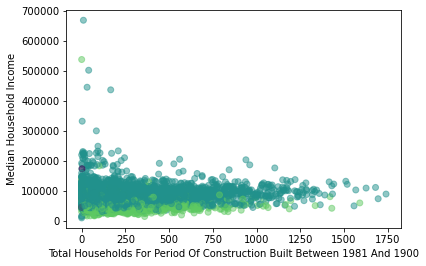

In [46]:
x = df['Total Households For Period Of Construction Built Between 1981 And 190']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1981 And 1900')
plt.ylabel('Median Household Income')
plt.show()

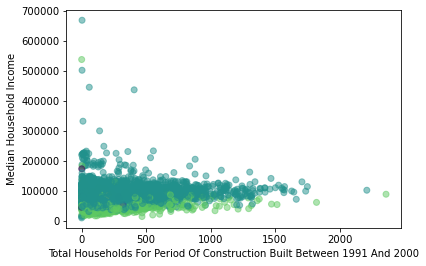

In [47]:
x = df['Total Households For Period Of Construction Built Between 1991 And 2000']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 1991 And 2000')
plt.ylabel('Median Household Income')
plt.show()

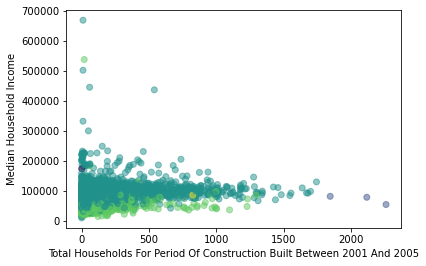

In [48]:
x = df['Total Households For Period Of Construction Built Between 2001 And 2005']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built Between 2001 And 2005')
plt.ylabel('Median Household Income')
plt.show()

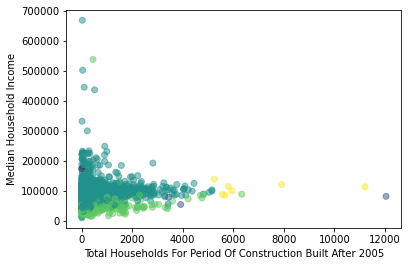

In [49]:
x = df['Total Households For Period Of Construction Built After 2005']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Period Of Construction Built After 2005')
plt.ylabel('Median Household Income')
plt.show()

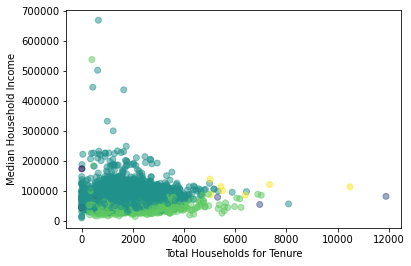

In [50]:
x = df['Total Households for Tenure']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households for Tenure')
plt.ylabel('Median Household Income')
plt.show()

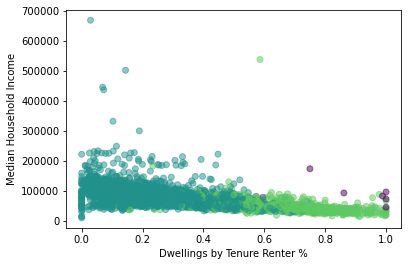

In [51]:
x = df['Dwellings by Tenure Renter %']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Dwellings by Tenure Renter %')
plt.ylabel('Median Household Income')
plt.show()

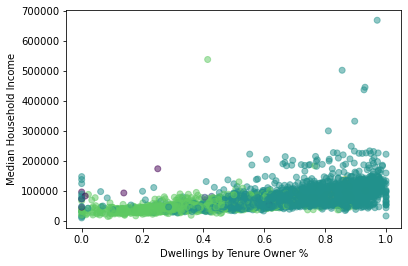

In [52]:
x = df['Dwellings by Tenure Owner %']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Dwellings by Tenure Owner %')
plt.ylabel('Median Household Income')
plt.show()

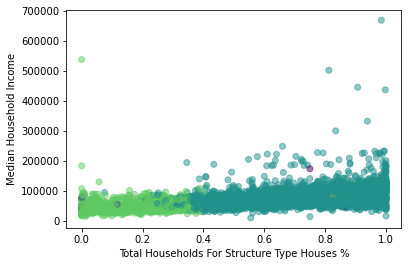

In [53]:
x = df['Total Households For Structure Type Houses %']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Houses %')
plt.ylabel('Median Household Income')
plt.show()

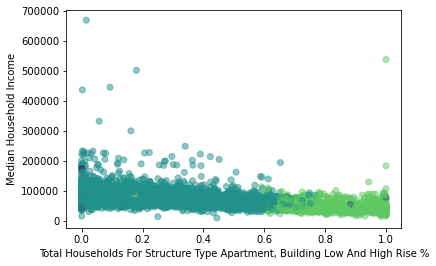

In [54]:
x = df['Total Households For Structure Type Apartment, Building Low And High Rise %']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Apartment, Building Low And High Rise %')
plt.ylabel('Median Household Income')
plt.show()

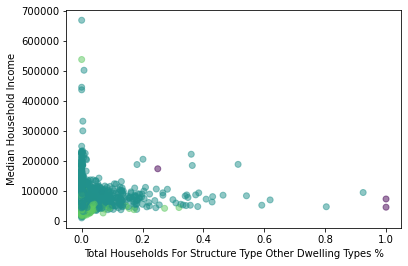

In [55]:
x = df['Total Households For Structure Type Other Dwelling Types %']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Total Households For Structure Type Other Dwelling Types %')
plt.ylabel('Median Household Income')
plt.show()

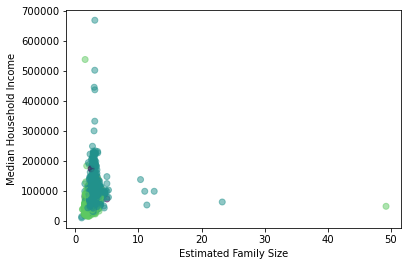

In [56]:
x = df['Estimated Family Size']
y = df['Median Household Income (Current Year $)']
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('Estimated Family Size')
plt.ylabel('Median Household Income')
plt.show()

In [57]:
df_temp = df
df_temp['label'] = labels
df_label1 = df_temp[df_temp['label']==0].drop(columns='label')
df_label2 = df_temp[df_temp['label']==1].drop(columns='label')
df_label3 = df_temp[df_temp['label']==2].drop(columns='label')
df_label4 = df_temp[df_temp['label']==3].drop(columns='label')
df_label5 = df_temp[df_temp['label']==4].drop(columns='label')

In [58]:
df_temp['label'].value_counts()

2    3873
3    1090
4       7
0       7
1       3
Name: label, dtype: int64

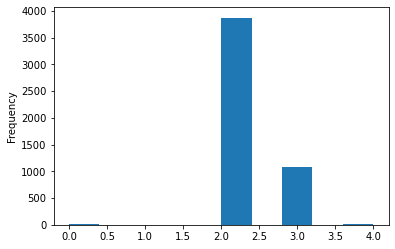

In [59]:
df_temp['label'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D406E6D90>,
      dtype=object)

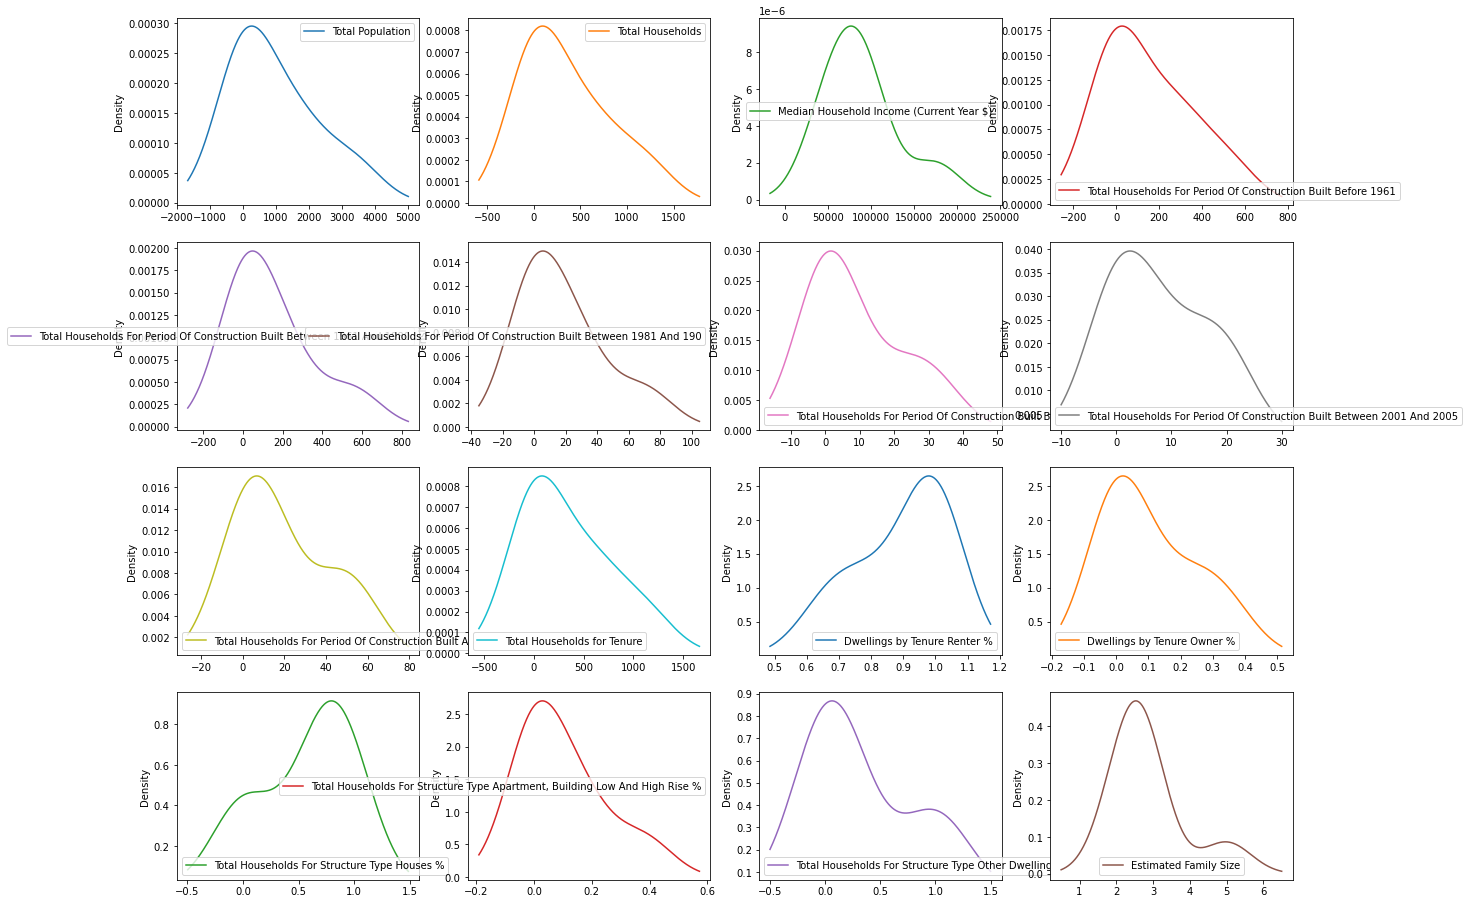

In [60]:
df_label1.plot(kind='density', subplots=True, layout=(5,4), figsize=(20, 20), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D3CC3BA90>,
      dtype=object)

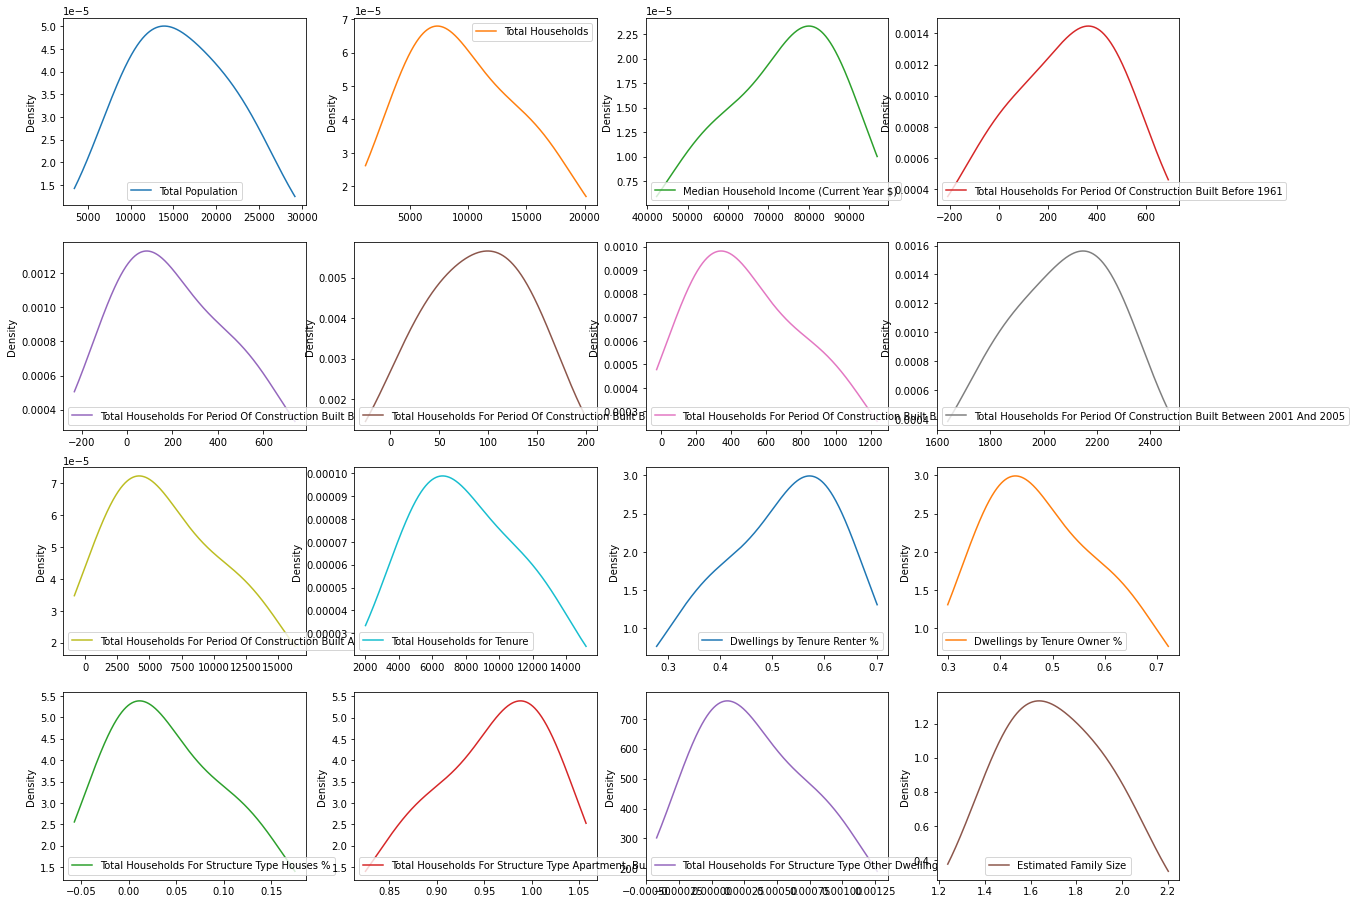

In [61]:
df_label2.plot(kind='density', subplots=True, layout=(5,4), figsize=(20, 20), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D3F5F8E80>,
      dtype=object)

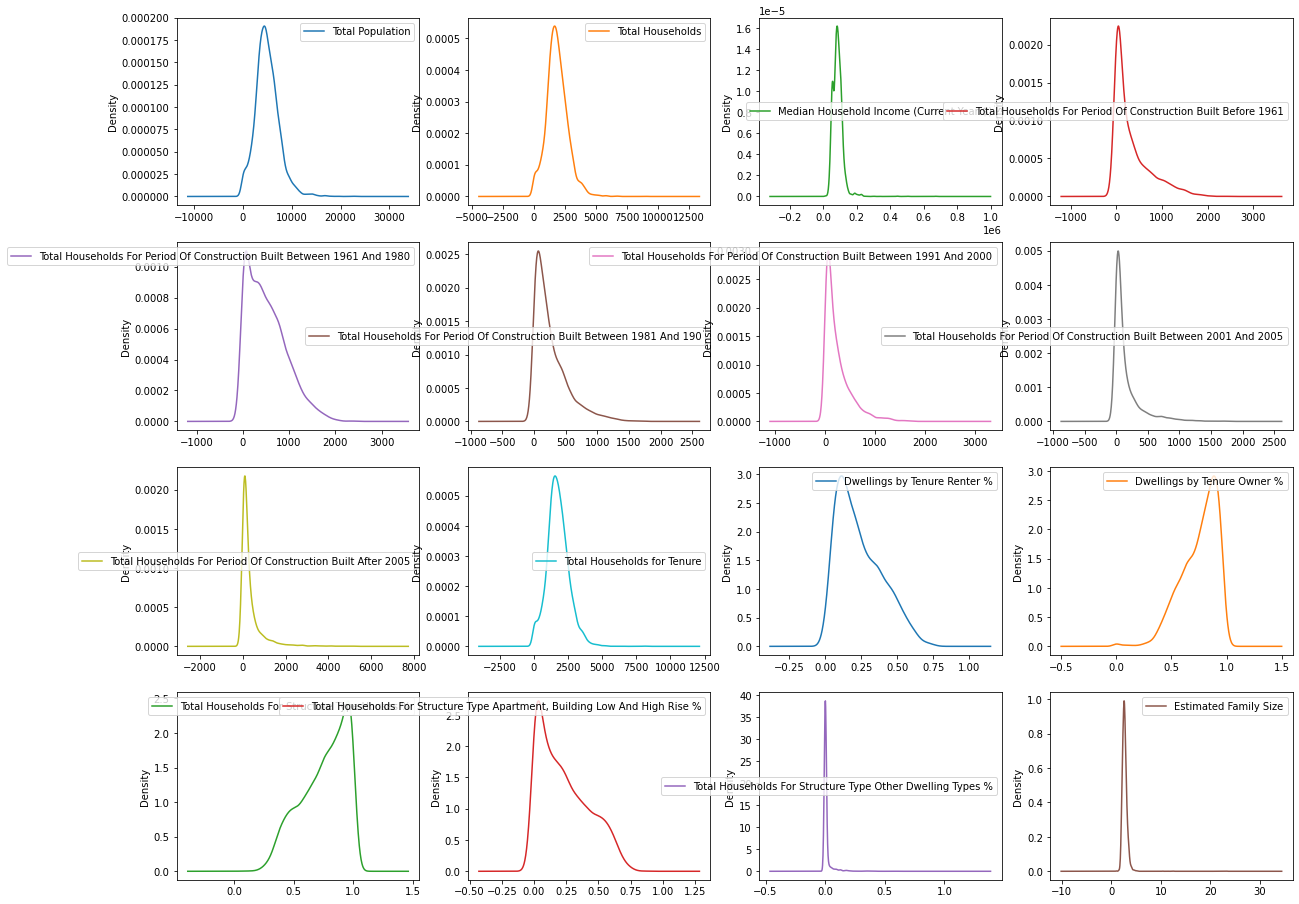

In [62]:
df_label3.plot(kind='density', subplots=True, layout=(5,4), figsize=(20, 20), sharex=False)

Only 1 point in cluster 4

In [63]:
#df_label4.plot(kind='hist', subplots=True, layout=(5,4), figsize=(20, 20), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D40C02E50>,
      dtype=object)

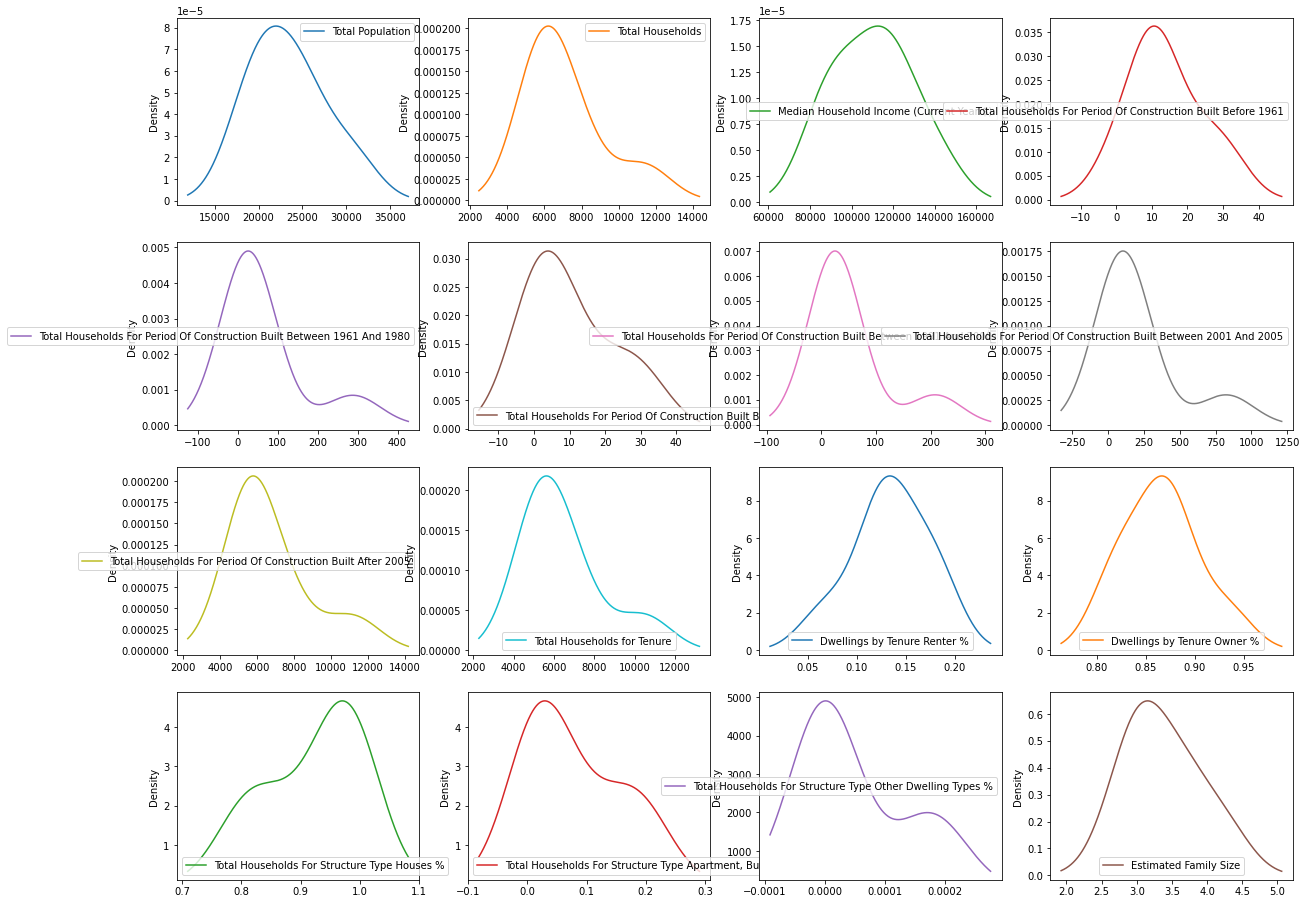

In [64]:
df_label5.plot(kind='density', subplots=True, layout=(5,4), figsize=(20, 20), sharex=False)

# Part 2
# Part F

Perform Birch clustering without median income variable

In [65]:
df_scaled_no_income = np.delete(df_scaled, 2, 1)

Using threshold = 0.45 and default branching factor = 50, the maximum clusters obtained is 5.  
Considering the context, number of clusters <= 5 is reasonable.

In [66]:
brc_max = Birch(n_clusters=None, threshold=0.45)
brc_max.fit(df_scaled_no_income)

Birch(n_clusters=None, threshold=0.45)

In [67]:
labels = brc_max.predict(df_scaled_no_income)
np.unique(labels)

array([0, 1, 2, 3, 4])

In [68]:
f = pd.DataFrame({'Median Household Income':df['Median Household Income (Current Year $)'], 'Label':labels})

In [69]:
stats.f_oneway(f['Median Household Income'][f['Label'] == 0],
               f['Median Household Income'][f['Label'] == 1],
               f['Median Household Income'][f['Label'] == 2],
               f['Median Household Income'][f['Label'] == 3],
               f['Median Household Income'][f['Label'] == 4])

F_onewayResult(statistic=713.0643799696155, pvalue=0.0)

Try 4 cluters

In [70]:
brc_4 = Birch(n_clusters=4, threshold=0.45)
brc_4.fit(df_scaled_no_income)
labels_4 = brc_4.predict(df_scaled_no_income)
np.unique(labels_4)

array([0, 1, 2, 3], dtype=int64)

In [71]:
f_4 = pd.DataFrame({'Median Household Income':df['Median Household Income (Current Year $)'], 'Label':labels_4})
stats.f_oneway(f_4['Median Household Income'][f_4['Label'] == 0],
               f_4['Median Household Income'][f_4['Label'] == 1],
               f_4['Median Household Income'][f_4['Label'] == 2],
               f_4['Median Household Income'][f_4['Label'] == 3])

F_onewayResult(statistic=612.3732509113328, pvalue=0.0)

Try 3 cluters

In [72]:
brc_3 = Birch(n_clusters=3, threshold=0.45)
brc_3.fit(df_scaled_no_income)
labels_3 = brc_3.predict(df_scaled_no_income)
np.unique(labels_3)

array([0, 1, 2], dtype=int64)

In [73]:
f_3 = pd.DataFrame({'Median Household Income':df['Median Household Income (Current Year $)'], 'Label':labels_3})
stats.f_oneway(f_3['Median Household Income'][f_3['Label'] == 0],
               f_3['Median Household Income'][f_3['Label'] == 1],
               f_3['Median Household Income'][f_3['Label'] == 2])

F_onewayResult(statistic=918.5191125984605, pvalue=0.0)

Try 2 cluters

In [74]:
brc_2 = Birch(n_clusters=2, threshold=0.45)
brc_2.fit(df_scaled_no_income)
labels_2 = brc_2.predict(df_scaled_no_income)
np.unique(labels_2)

array([0, 1], dtype=int64)

In [75]:
f_2 = pd.DataFrame({'Median Household Income':df['Median Household Income (Current Year $)'], 'Label':labels_2})
stats.f_oneway(f_2['Median Household Income'][f_2['Label'] == 0],
               f_2['Median Household Income'][f_2['Label'] == 1])

F_onewayResult(statistic=1.3735406344436432, pvalue=0.24126057057844072)

The optimal number of clusters is 3 because it delivers the largest F-statistic with smallest p-value.

In [76]:
df['label'] = labels_3

In [77]:
df.to_csv('cleaned_df_with_label.csv', index=False)

# Part g
# First using clusters to assign the test data set

In [78]:
df_t=pd.read_csv("CensusCanada2016Test.csv")

In [79]:
df_t["Total Households For Period Of Construction Built After 2005"] = df_t["Total Households For Period Of Construction"] - df_t["Total Households For Period Of Construction Built Before 1961"] - df_t["Total Households For Period Of Construction Built Between 1961 And 1980"] - df_t["Total Households For Period Of Construction Built Between 1981 And 190"] - df_t["Total Households For Period Of Construction Built Between 1991 And 2000"] - df_t["Total Households For Period Of Construction Built Between 2001 And 2005"]
cols = df_t.columns.tolist()
cols = cols[:9] + cols[-1:] + cols[9:-1]
df_t = df_t[cols]

In [80]:
df_t = df_t.drop(columns='Total Households For Period Of Construction')

In [81]:
df_t['Dwellings by Tenure Renter %'] = df_t['Dwellings by Tenure Renter'] / df_t['Total Households for Tenure']
df_t['Dwellings by Tenure Owner %'] = df_t['Dwellings by Tenure Owner'] / df_t['Total Households for Tenure']
df_t["Total Households For Structure Type Houses %"] = df_t["Total Households For Structure Type Houses"] / df_t["Total Households"]
df_t["Total Households For Structure Type Apartment, Building Low And High Rise %"] = df_t["Total Households For Structure Type Apartment, Building Low And High Rise"] / df_t["Total Households"]
df_t["Total Households For Structure Type Other Dwelling Types %"] = df_t["Total Households For Structure Type Other Dwelling Types"] / df_t["Total Households"]

In [82]:
df_t['Estimated Family Size'] = df_t['Total Population'] / df_t['Total Households']
df_t = df_t.drop(columns=['Dwellings by Tenure Owner', 'Dwellings by Tenure Renter', 'Total Households For Structure Type Houses', 'Total Households For Structure Type Apartment, Building Low And High Rise', 'Total Households For Structure Type Other Dwelling Types'])

In [83]:
df_t = df_t.fillna(0)
df_t = df_t.replace(np.inf, 0)

In [84]:
df_t

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size
0,2692,893,15,21,46,648,114,49,836,0.055024,0.944976,0.988802,0.011198,0.000000,3.014558
1,3884,1511,17,839,218,27,33,377,1399,0.137241,0.862759,0.678359,0.321641,0.000000,2.570483
2,7014,2768,767,615,223,435,166,562,2552,0.399295,0.600705,0.502168,0.497832,0.000000,2.533960
3,9136,4577,1540,969,437,244,457,930,4232,0.432420,0.567580,0.459253,0.537688,0.003059,1.996067
4,3614,1167,44,94,34,115,184,696,1080,0.035185,0.964815,0.916024,0.083976,0.000000,3.096829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,199,64,0,32,14,12,0,6,60,0.150000,0.533333,0.859375,0.000000,0.140625,3.109375
717,3104,1718,799,575,186,114,25,19,1687,0.827504,0.172496,0.088475,0.908615,0.002910,1.806752
718,1322,501,360,101,3,11,0,26,493,0.146045,0.853955,0.960080,0.039920,0.000000,2.638723
719,4288,1379,227,553,408,91,19,81,1358,0.115611,0.884389,0.828861,0.171139,0.000000,3.109500


In [85]:
df_no_income = df.drop(columns=['Median Household Income (Current Year $)'])
df_no_income_no_label = df_no_income.drop(['label'], axis = 1)

In [86]:
scaler = MinMaxScaler()
df_t_scaled = scaler.fit(df_no_income_no_label).transform(df_t)

In [87]:
df_scaled_no_income.shape

(4980, 15)

In [88]:
brc_3_t = Birch(n_clusters=3, threshold=0.45)
brc_3_t.fit(df_scaled_no_income)
labels_3 = brc_3_t.predict(df_t_scaled)
np.unique(labels_3)

array([0, 1, 2], dtype=int64)

In [89]:
df_t['label']=labels_3
df_t

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size,label
0,2692,893,15,21,46,648,114,49,836,0.055024,0.944976,0.988802,0.011198,0.000000,3.014558,1
1,3884,1511,17,839,218,27,33,377,1399,0.137241,0.862759,0.678359,0.321641,0.000000,2.570483,1
2,7014,2768,767,615,223,435,166,562,2552,0.399295,0.600705,0.502168,0.497832,0.000000,2.533960,1
3,9136,4577,1540,969,437,244,457,930,4232,0.432420,0.567580,0.459253,0.537688,0.003059,1.996067,1
4,3614,1167,44,94,34,115,184,696,1080,0.035185,0.964815,0.916024,0.083976,0.000000,3.096829,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,199,64,0,32,14,12,0,6,60,0.150000,0.533333,0.859375,0.000000,0.140625,3.109375,1
717,3104,1718,799,575,186,114,25,19,1687,0.827504,0.172496,0.088475,0.908615,0.002910,1.806752,2
718,1322,501,360,101,3,11,0,26,493,0.146045,0.853955,0.960080,0.039920,0.000000,2.638723,1
719,4288,1379,227,553,408,91,19,81,1358,0.115611,0.884389,0.828861,0.171139,0.000000,3.109500,1


In [90]:
df_t.to_csv("labeledtest.csv")

# Creating The Global Model
`df` is the training data set\
`df_t` is the testing data set\
tareget variable is Median Household Income

In [91]:
df=df[['Total Population',
    'Total Households', 
    'Total Households For Period Of Construction Built Before 1961',
    'Total Households For Period Of Construction Built Between 1961 And 1980',
    'Total Households For Period Of Construction Built Between 1981 And 190',
    'Total Households For Period Of Construction Built Between 1991 And 2000',
    'Total Households For Period Of Construction Built Between 2001 And 2005',
    'Total Households For Period Of Construction Built After 2005',
    'Total Households for Tenure',
    'Dwellings by Tenure Renter %',
    'Dwellings by Tenure Owner %',
    'Total Households For Structure Type Houses %',
    'Total Households For Structure Type Apartment, Building Low And High Rise %',
    'Total Households For Structure Type Other Dwelling Types %',
    'Estimated Family Size',
    'label',
    'Median Household Income (Current Year $)']]

We are going to use ANN regressor, Decision Tree regressor and Linear regression to predict 

In [92]:
scaler=MinMaxScaler()

X=scaler.fit_transform(df_no_income)
y=df['Median Household Income (Current Year $)']

scaled_data_test=scaler.transform(df_t)

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

### ANN Approach

In [96]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# define base model
def create_model(n_neurons1 = 13, n_neurons2 = 0, n_neurons3 = 0):
    # create model
    model = Sequential()
    model.add(Dense(n_neurons1, input_dim=16, kernel_initializer='uniform', activation='relu'))
    #if (n_neurons2 != 0) and (n_neurons2 <= n_neurons1):
    #    model.add(Dense(n_neurons2_prop, kernel_initializer='uniform', activation='relu'))
    #    if (n_neurons3 != 0) and (n_neurons3 <= n_neurons2):
    #        model.add(Dense(n_neurons3, kernel_initializer='uniform', activation='relu'))
    #    else:
    #        pass
    #else:
    #    pass
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics = ['mae'])
    return model

In [97]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

global_model = create_model(n_neurons1 = 13)

history1 = global_model.fit(X_train, y_train, epochs=500, batch_size = 10, verbose=1,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

y_pred = global_model.predict(X_valid)

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 7288507311.3600 - mae: 77815.6056 - val_loss: 7025329664.0000 - val_mae: 77867.8125
Epoch 2/500
399/399 [==============================] - 0s 857us/step - loss: 7366174659.8400 - mae: 77670.2007 - val_loss: 7018982912.0000 - val_mae: 77826.4375
Epoch 3/500
399/399 [==============================] - 0s 882us/step - loss: 7208668915.2000 - mae: 77742.8664 - val_loss: 7009222656.0000 - val_mae: 77762.7188
Epoch 4/500
399/399 [==============================] - 0s 829us/step - loss: 7779727070.7200 - mae: 78745.5771 - val_loss: 6996493824.0000 - val_mae: 77679.6406
Epoch 5/500
399/399 [==============================] - 0s 1ms/step - loss: 7381280492.8000 - mae: 77719.6517 - val_loss: 6981047296.0000 - val_mae: 77578.6719
Epoch 6/500
399/399 [==============================] - 0s 812us/step - loss: 7098492906.2400 - mae: 77424.2923 - val_loss: 6963157504.0000 - val_mae: 77461.5547
Epoch 7/500
399/399 [=================

Epoch 52/500
399/399 [==============================] - 0s 926us/step - loss: 4864015904.6400 - mae: 60212.4713 - val_loss: 4589374976.0000 - val_mae: 59853.6914
Epoch 53/500
399/399 [==============================] - 0s 1ms/step - loss: 4766834446.7200 - mae: 59552.9505 - val_loss: 4517149184.0000 - val_mae: 59232.9766
Epoch 54/500
399/399 [==============================] - 0s 994us/step - loss: 4497278657.9200 - mae: 58218.5188 - val_loss: 4444440064.0000 - val_mae: 58602.6055
Epoch 55/500
399/399 [==============================] - 0s 812us/step - loss: 4582091507.8400 - mae: 58293.4173 - val_loss: 4371527680.0000 - val_mae: 57964.7383
Epoch 56/500
399/399 [==============================] - 0s 824us/step - loss: 4238987982.0800 - mae: 56721.7637 - val_loss: 4298688512.0000 - val_mae: 57320.0430
Epoch 57/500
399/399 [==============================] - 0s 1ms/step - loss: 4279874430.0800 - mae: 56799.3301 - val_loss: 4225408000.0000 - val_mae: 56663.6367
Epoch 58/500
399/399 [==========

Epoch 103/500
399/399 [==============================] - 0s 797us/step - loss: 1439628570.5600 - mae: 28842.9598 - val_loss: 1487541120.0000 - val_mae: 29249.1641
Epoch 104/500
399/399 [==============================] - 0s 832us/step - loss: 1785120770.0800 - mae: 29017.7047 - val_loss: 1456958720.0000 - val_mae: 28930.4688
Epoch 105/500
399/399 [==============================] - 0s 842us/step - loss: 1523224132.4800 - mae: 28228.0936 - val_loss: 1428030208.0000 - val_mae: 28630.9375
Epoch 106/500
399/399 [==============================] - 0s 779us/step - loss: 1439441954.5600 - mae: 27595.3676 - val_loss: 1400460928.0000 - val_mae: 28340.2734
Epoch 107/500
399/399 [==============================] - 0s 739us/step - loss: 1592402303.3600 - mae: 28288.8192 - val_loss: 1374764032.0000 - val_mae: 28071.3730
Epoch 108/500
399/399 [==============================] - 0s 802us/step - loss: 1661813872.0000 - mae: 28425.5739 - val_loss: 1350378880.0000 - val_mae: 27813.3320
Epoch 109/500
399/399 

399/399 [==============================] - 0s 850us/step - loss: 998840585.9200 - mae: 21708.5176 - val_loss: 924413376.0000 - val_mae: 22480.2031
Epoch 154/500
399/399 [==============================] - 0s 890us/step - loss: 935217004.9600 - mae: 21802.5076 - val_loss: 919390144.0000 - val_mae: 22404.0195
Epoch 155/500
399/399 [==============================] - 0s 829us/step - loss: 1147678138.7200 - mae: 22028.0536 - val_loss: 914458560.0000 - val_mae: 22328.0664
Epoch 156/500
399/399 [==============================] - 0s 802us/step - loss: 947669378.4000 - mae: 21556.2082 - val_loss: 909547648.0000 - val_mae: 22252.3516
Epoch 157/500
399/399 [==============================] - 0s 1ms/step - loss: 1018237246.8800 - mae: 21824.5023 - val_loss: 904661952.0000 - val_mae: 22175.9141
Epoch 158/500
399/399 [==============================] - 0s 880us/step - loss: 887337468.6400 - mae: 21200.7166 - val_loss: 899830272.0000 - val_mae: 22100.5742
Epoch 159/500
399/399 [=========================

399/399 [==============================] - 0s 834us/step - loss: 745028897.0400 - mae: 17926.9541 - val_loss: 715301632.0000 - val_mae: 18908.2266
Epoch 205/500
399/399 [==============================] - 0s 1ms/step - loss: 954177539.9200 - mae: 18344.1890 - val_loss: 712020224.0000 - val_mae: 18848.5762
Epoch 206/500
399/399 [==============================] - 0s 990us/step - loss: 635754596.6400 - mae: 17629.4783 - val_loss: 708743424.0000 - val_mae: 18787.7168
Epoch 207/500
399/399 [==============================] - 0s 780us/step - loss: 931469834.3200 - mae: 18403.3692 - val_loss: 705589120.0000 - val_mae: 18728.7266
Epoch 208/500
399/399 [==============================] - 0s 1ms/step - loss: 967138111.2800 - mae: 18614.3036 - val_loss: 702430912.0000 - val_mae: 18673.3066
Epoch 209/500
399/399 [==============================] - 1s 1ms/step - loss: 868155354.9600 - mae: 18598.8551 - val_loss: 699313984.0000 - val_mae: 18615.5137
Epoch 210/500
399/399 [==============================]

399/399 [==============================] - 0s 1ms/step - loss: 559632667.0800 - mae: 15022.0960 - val_loss: 590984832.0000 - val_mae: 16494.6367
Epoch 256/500
399/399 [==============================] - 1s 1ms/step - loss: 617483904.2400 - mae: 15606.5737 - val_loss: 589297856.0000 - val_mae: 16461.5957
Epoch 257/500
399/399 [==============================] - 1s 1ms/step - loss: 660106063.2800 - mae: 15437.8791 - val_loss: 587633856.0000 - val_mae: 16424.2480
Epoch 258/500
399/399 [==============================] - 1s 1ms/step - loss: 671121950.7200 - mae: 15489.9067 - val_loss: 586033216.0000 - val_mae: 16391.2031
Epoch 259/500
399/399 [==============================] - 1s 1ms/step - loss: 635241877.6400 - mae: 15456.9965 - val_loss: 584433984.0000 - val_mae: 16354.8291
Epoch 260/500
399/399 [==============================] - 0s 1ms/step - loss: 552466035.1000 - mae: 15254.9566 - val_loss: 582870336.0000 - val_mae: 16321.3916
Epoch 261/500
399/399 [==============================] - 1s 

399/399 [==============================] - 0s 904us/step - loss: 477317532.3600 - mae: 13843.4867 - val_loss: 533570272.0000 - val_mae: 15210.0098
Epoch 307/500
399/399 [==============================] - 0s 934us/step - loss: 629302447.3200 - mae: 14379.7132 - val_loss: 532898336.0000 - val_mae: 15195.8242
Epoch 308/500
399/399 [==============================] - 0s 894us/step - loss: 697025809.6800 - mae: 14889.9234 - val_loss: 532235648.0000 - val_mae: 15181.6582
Epoch 309/500
399/399 [==============================] - 0s 879us/step - loss: 619158487.2000 - mae: 14825.2902 - val_loss: 531583392.0000 - val_mae: 15167.3721
Epoch 310/500
399/399 [==============================] - 0s 1ms/step - loss: 524146218.6400 - mae: 13571.9000 - val_loss: 530948160.0000 - val_mae: 15151.5078
Epoch 311/500
399/399 [==============================] - 0s 1ms/step - loss: 796130012.1600 - mae: 14851.3697 - val_loss: 530326208.0000 - val_mae: 15136.2295
Epoch 312/500
399/399 [=============================

399/399 [==============================] - 0s 1ms/step - loss: 823375654.8800 - mae: 14584.7427 - val_loss: 510383936.0000 - val_mae: 14711.1748
Epoch 358/500
399/399 [==============================] - 0s 985us/step - loss: 666019261.8800 - mae: 14375.8265 - val_loss: 510105344.0000 - val_mae: 14705.7754
Epoch 359/500
399/399 [==============================] - 0s 805us/step - loss: 864654281.2800 - mae: 14723.5409 - val_loss: 509823776.0000 - val_mae: 14700.1123
Epoch 360/500
399/399 [==============================] - 0s 822us/step - loss: 655645429.3800 - mae: 14345.5518 - val_loss: 509549120.0000 - val_mae: 14694.5166
Epoch 361/500
399/399 [==============================] - 0s 1000us/step - loss: 702146952.9200 - mae: 14273.2909 - val_loss: 509277248.0000 - val_mae: 14687.7822
Epoch 362/500
399/399 [==============================] - 0s 807us/step - loss: 928564674.8000 - mae: 15071.3791 - val_loss: 509010016.0000 - val_mae: 14681.6904
Epoch 363/500
399/399 [==========================

399/399 [==============================] - 0s 762us/step - loss: 943373162.8000 - mae: 14821.8396 - val_loss: 499702240.0000 - val_mae: 14487.8271
Epoch 409/500
399/399 [==============================] - 0s 764us/step - loss: 720798258.5600 - mae: 14708.5559 - val_loss: 499546624.0000 - val_mae: 14484.8291
Epoch 410/500
399/399 [==============================] - 0s 852us/step - loss: 779460682.8400 - mae: 14554.3847 - val_loss: 499393152.0000 - val_mae: 14481.3779
Epoch 411/500
399/399 [==============================] - 0s 837us/step - loss: 543803359.8400 - mae: 13856.6143 - val_loss: 499237568.0000 - val_mae: 14476.5371
Epoch 412/500
399/399 [==============================] - 0s 764us/step - loss: 714673839.3000 - mae: 14384.2592 - val_loss: 499090272.0000 - val_mae: 14475.5918
Epoch 413/500
399/399 [==============================] - ETA: 0s - loss: 704351136.6851 - mae: 14239.359 - 0s 837us/step - loss: 704088679.8000 - mae: 14238.5318 - val_loss: 498942560.0000 - val_mae: 14472.372

Epoch 459/500
399/399 [==============================] - 0s 767us/step - loss: 609925408.4400 - mae: 13808.3370 - val_loss: 493479168.0000 - val_mae: 14370.1064
Epoch 460/500
399/399 [==============================] - 0s 779us/step - loss: 623997484.7200 - mae: 14086.6556 - val_loss: 493381088.0000 - val_mae: 14367.0459
Epoch 461/500
399/399 [==============================] - 0s 764us/step - loss: 555762691.1600 - mae: 13973.1885 - val_loss: 493290912.0000 - val_mae: 14364.0195
Epoch 462/500
399/399 [==============================] - 0s 759us/step - loss: 752797796.1600 - mae: 14448.8840 - val_loss: 493192128.0000 - val_mae: 14363.9971
Epoch 463/500
399/399 [==============================] - 0s 759us/step - loss: 566392807.3600 - mae: 13838.9195 - val_loss: 493093504.0000 - val_mae: 14360.6982
Epoch 464/500
399/399 [==============================] - 0s 799us/step - loss: 677739985.2400 - mae: 13909.3530 - val_loss: 492999936.0000 - val_mae: 14359.5498
Epoch 465/500
399/399 [===========

In [98]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_pred, np.array(y_valid)))
print(mae(y_pred, np.array(y_valid)))

489976331.099766
14302.509146664785


In [99]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

global_model = create_model(n_neurons1 = 15)

history1 = global_model.fit(X_train, y_train, epochs=500, batch_size = 10, verbose=1,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

y_pred = global_model.predict(X_valid)

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 6920901038.0800 - mae: 77196.9118 - val_loss: 7024892928.0000 - val_mae: 77864.9531
Epoch 2/500
399/399 [==============================] - 0s 794us/step - loss: 7006914168.3200 - mae: 77445.0729 - val_loss: 7017747456.0000 - val_mae: 77818.4141
Epoch 3/500
399/399 [==============================] - 0s 812us/step - loss: 7159521703.6800 - mae: 78033.3246 - val_loss: 7006688256.0000 - val_mae: 77746.2500
Epoch 4/500
399/399 [==============================] - 0s 792us/step - loss: 7234507279.3600 - mae: 78350.8168 - val_loss: 6992179712.0000 - val_mae: 77651.4922
Epoch 5/500
399/399 [==============================] - 0s 782us/step - loss: 7005165880.3200 - mae: 76990.2695 - val_loss: 6974573056.0000 - val_mae: 77536.4062
Epoch 6/500
399/399 [==============================] - 0s 799us/step - loss: 6712839864.3200 - mae: 76185.1099 - val_loss: 6954113536.0000 - val_mae: 77402.3594
Epoch 7/500
399/399 [===============

Epoch 52/500
399/399 [==============================] - 0s 777us/step - loss: 4221889050.2400 - mae: 57258.7566 - val_loss: 4304730624.0000 - val_mae: 57374.8125
Epoch 53/500
399/399 [==============================] - 0s 767us/step - loss: 4588666264.3200 - mae: 57027.3539 - val_loss: 4226359808.0000 - val_mae: 56673.3164
Epoch 54/500
399/399 [==============================] - 0s 777us/step - loss: 4318768972.1600 - mae: 55591.6848 - val_loss: 4147898112.0000 - val_mae: 55964.2344
Epoch 55/500
399/399 [==============================] - 0s 789us/step - loss: 4265734719.3600 - mae: 55180.7153 - val_loss: 4069503744.0000 - val_mae: 55246.9453
Epoch 56/500
399/399 [==============================] - 0s 796us/step - loss: 4377993977.6000 - mae: 54782.7931 - val_loss: 3991052288.0000 - val_mae: 54519.7891
Epoch 57/500
399/399 [==============================] - 0s 784us/step - loss: 3905666200.3200 - mae: 53032.5499 - val_loss: 3912489216.0000 - val_mae: 53782.5898
Epoch 58/500
399/399 [======

399/399 [==============================] - 0s 784us/step - loss: 1497662334.4000 - mae: 27270.3212 - val_loss: 1320678144.0000 - val_mae: 27489.2852
Epoch 103/500
399/399 [==============================] - 0s 812us/step - loss: 1545445908.3200 - mae: 27732.8328 - val_loss: 1297712768.0000 - val_mae: 27232.4336
Epoch 104/500
399/399 [==============================] - 0s 774us/step - loss: 1483085991.0400 - mae: 27388.9325 - val_loss: 1276473600.0000 - val_mae: 26987.9004
Epoch 105/500
399/399 [==============================] - 0s 769us/step - loss: 1455920106.2400 - mae: 26511.6528 - val_loss: 1256322304.0000 - val_mae: 26755.1621
Epoch 106/500
399/399 [==============================] - 0s 767us/step - loss: 1411188355.2000 - mae: 26840.6519 - val_loss: 1237576832.0000 - val_mae: 26536.5332
Epoch 107/500
399/399 [==============================] - 0s 769us/step - loss: 1710047013.4400 - mae: 26419.7425 - val_loss: 1220126336.0000 - val_mae: 26339.9512
Epoch 108/500
399/399 [=============

399/399 [==============================] - 0s 800us/step - loss: 1134779566.2400 - mae: 21925.2945 - val_loss: 877318848.0000 - val_mae: 21742.0781
Epoch 153/500
399/399 [==============================] - 0s 769us/step - loss: 1054871623.8400 - mae: 20947.2405 - val_loss: 872382080.0000 - val_mae: 21662.1426
Epoch 154/500
399/399 [==============================] - 0s 912us/step - loss: 953869500.6400 - mae: 21411.1599 - val_loss: 867567424.0000 - val_mae: 21584.1289
Epoch 155/500
399/399 [==============================] - 0s 777us/step - loss: 1205684066.5600 - mae: 21236.3719 - val_loss: 862782400.0000 - val_mae: 21505.7422
Epoch 156/500
399/399 [==============================] - 0s 772us/step - loss: 923942150.3200 - mae: 20731.4670 - val_loss: 857919680.0000 - val_mae: 21426.3145
Epoch 157/500
399/399 [==============================] - 0s 772us/step - loss: 1069466102.3200 - mae: 21098.2837 - val_loss: 853146368.0000 - val_mae: 21348.5195
Epoch 158/500
399/399 [=====================

Epoch 203/500
399/399 [==============================] - 0s 982us/step - loss: 753352691.1200 - mae: 17114.4672 - val_loss: 675845376.0000 - val_mae: 18183.6562
Epoch 204/500
399/399 [==============================] - 0s 854us/step - loss: 643257784.3600 - mae: 17337.1534 - val_loss: 672850688.0000 - val_mae: 18126.3496
Epoch 205/500
399/399 [==============================] - 0s 897us/step - loss: 896517741.6000 - mae: 17716.9722 - val_loss: 669945664.0000 - val_mae: 18070.4629
Epoch 206/500
399/399 [==============================] - 0s 852us/step - loss: 921703088.2400 - mae: 17675.8557 - val_loss: 667136064.0000 - val_mae: 18018.3828
Epoch 207/500
399/399 [==============================] - 0s 852us/step - loss: 890334692.8800 - mae: 17662.7619 - val_loss: 664303552.0000 - val_mae: 17962.9160
Epoch 208/500
399/399 [==============================] - 0s 937us/step - loss: 772355662.6000 - mae: 17316.8118 - val_loss: 661489088.0000 - val_mae: 17907.9160
Epoch 209/500
399/399 [===========

Epoch 254/500
399/399 [==============================] - 0s 774us/step - loss: 908780639.3200 - mae: 15985.6009 - val_loss: 566932928.0000 - val_mae: 15964.3926
Epoch 255/500
399/399 [==============================] - 0s 787us/step - loss: 665760689.4000 - mae: 15170.1452 - val_loss: 565549952.0000 - val_mae: 15932.6074
Epoch 256/500
399/399 [==============================] - 0s 764us/step - loss: 729746648.8400 - mae: 15081.8112 - val_loss: 564237248.0000 - val_mae: 15903.5762
Epoch 257/500
399/399 [==============================] - 0s 769us/step - loss: 708171112.4400 - mae: 15248.8773 - val_loss: 562926208.0000 - val_mae: 15874.3652
Epoch 258/500
399/399 [==============================] - 0s 777us/step - loss: 625789675.4800 - mae: 14975.4872 - val_loss: 561631680.0000 - val_mae: 15846.5234
Epoch 259/500
399/399 [==============================] - 0s 767us/step - loss: 748828555.2400 - mae: 15185.9984 - val_loss: 560373504.0000 - val_mae: 15815.8857
Epoch 260/500
399/399 [===========

Epoch 305/500
399/399 [==============================] - 0s 776us/step - loss: 505418891.4400 - mae: 13915.6104 - val_loss: 522088928.0000 - val_mae: 14958.9531
Epoch 306/500
399/399 [==============================] - 0s 779us/step - loss: 596610397.5600 - mae: 14151.0539 - val_loss: 521578016.0000 - val_mae: 14947.8828
Epoch 307/500
399/399 [==============================] - 0s 782us/step - loss: 663331746.8000 - mae: 14447.2398 - val_loss: 521087136.0000 - val_mae: 14937.8779
Epoch 308/500
399/399 [==============================] - 0s 772us/step - loss: 847794498.1200 - mae: 14544.7524 - val_loss: 520600160.0000 - val_mae: 14927.6318
Epoch 309/500
399/399 [==============================] - 0s 774us/step - loss: 663277470.7200 - mae: 14532.0311 - val_loss: 520117408.0000 - val_mae: 14916.0283
Epoch 310/500
399/399 [==============================] - 0s 777us/step - loss: 762626184.6000 - mae: 14794.3095 - val_loss: 519630176.0000 - val_mae: 14905.5811
Epoch 311/500
399/399 [===========

Epoch 356/500
399/399 [==============================] - 0s 772us/step - loss: 762491348.1600 - mae: 14443.5149 - val_loss: 504744192.0000 - val_mae: 14593.3525
Epoch 357/500
399/399 [==============================] - 0s 769us/step - loss: 601987088.1600 - mae: 14174.7659 - val_loss: 504522880.0000 - val_mae: 14590.2627
Epoch 358/500
399/399 [==============================] - 0s 779us/step - loss: 710059199.9600 - mae: 14205.1029 - val_loss: 504300032.0000 - val_mae: 14584.1445
Epoch 359/500
399/399 [==============================] - 0s 777us/step - loss: 547131873.8400 - mae: 13635.8250 - val_loss: 504090304.0000 - val_mae: 14579.6553
Epoch 360/500
399/399 [==============================] - 0s 887us/step - loss: 734208795.4400 - mae: 14521.7463 - val_loss: 503868672.0000 - val_mae: 14575.6182
Epoch 361/500
399/399 [==============================] - 0s 767us/step - loss: 654087244.1600 - mae: 14622.3291 - val_loss: 503659616.0000 - val_mae: 14572.6553
Epoch 362/500
399/399 [===========

Epoch 407/500
399/399 [==============================] - 0s 772us/step - loss: 705954882.0400 - mae: 14288.5892 - val_loss: 496175552.0000 - val_mae: 14418.2217
Epoch 408/500
399/399 [==============================] - 0s 772us/step - loss: 659098277.7600 - mae: 14158.6753 - val_loss: 496040672.0000 - val_mae: 14416.0703
Epoch 409/500
399/399 [==============================] - 0s 759us/step - loss: 947969274.7200 - mae: 14790.2505 - val_loss: 495907904.0000 - val_mae: 14414.2852
Epoch 410/500
399/399 [==============================] - 0s 764us/step - loss: 781885023.3600 - mae: 14354.5585 - val_loss: 495779424.0000 - val_mae: 14410.4678
Epoch 411/500
399/399 [==============================] - 0s 769us/step - loss: 658910277.1200 - mae: 13623.7071 - val_loss: 495657088.0000 - val_mae: 14409.3145
Epoch 412/500
399/399 [==============================] - 0s 769us/step - loss: 672624626.8000 - mae: 14028.8330 - val_loss: 495540224.0000 - val_mae: 14406.7988
Epoch 413/500
399/399 [===========

Epoch 458/500
399/399 [==============================] - 0s 769us/step - loss: 739459327.2000 - mae: 14259.3873 - val_loss: 490864832.0000 - val_mae: 14320.0469
Epoch 459/500
399/399 [==============================] - 0s 772us/step - loss: 1094896906.2200 - mae: 14771.0283 - val_loss: 490779136.0000 - val_mae: 14317.9375
Epoch 460/500
399/399 [==============================] - 0s 774us/step - loss: 548704510.3200 - mae: 13620.0959 - val_loss: 490695968.0000 - val_mae: 14315.0840
Epoch 461/500
399/399 [==============================] - 0s 780us/step - loss: 539849037.8000 - mae: 13788.8255 - val_loss: 490611776.0000 - val_mae: 14314.7881
Epoch 462/500
399/399 [==============================] - 0s 784us/step - loss: 576534657.3800 - mae: 13742.6567 - val_loss: 490535232.0000 - val_mae: 14311.5674
Epoch 463/500
399/399 [==============================] - 0s 769us/step - loss: 488914393.6600 - mae: 13631.7310 - val_loss: 490447584.0000 - val_mae: 14312.3975
Epoch 464/500
399/399 [==========

In [100]:
print(mse(y_pred, np.array(y_valid)))
print(mae(y_pred, np.array(y_valid)))

487723674.5282107
14261.333286113202


In [101]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

global_model = create_model(n_neurons1 = 13)

history1 = global_model.fit(X_train, y_train, epochs=1000, batch_size = 10, verbose=1,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

y_pred = global_model.predict(X_valid)

Epoch 1/1000
399/399 [==============================] - 1s 1ms/step - loss: 7187563512.3200 - mae: 77970.3850 - val_loss: 7025380352.0000 - val_mae: 77868.1328
Epoch 2/1000
399/399 [==============================] - 0s 779us/step - loss: 7339766337.2800 - mae: 78721.9709 - val_loss: 7019162112.0000 - val_mae: 77827.5625
Epoch 3/1000
399/399 [==============================] - 0s 807us/step - loss: 7179163855.3600 - mae: 77360.9480 - val_loss: 7009473024.0000 - val_mae: 77764.3984
Epoch 4/1000
399/399 [==============================] - 0s 797us/step - loss: 7199148684.8000 - mae: 77756.4343 - val_loss: 6996774912.0000 - val_mae: 77681.5156
Epoch 5/1000
399/399 [==============================] - 0s 782us/step - loss: 6889345347.2000 - mae: 76365.8918 - val_loss: 6981338112.0000 - val_mae: 77580.6484
Epoch 6/1000
399/399 [==============================] - 0s 787us/step - loss: 7274746826.2400 - mae: 77859.3844 - val_loss: 6963488768.0000 - val_mae: 77463.7969
Epoch 7/1000
399/399 [========

399/399 [==============================] - 0s 834us/step - loss: 4991282717.4400 - mae: 61087.6425 - val_loss: 4662861312.0000 - val_mae: 60479.1289
Epoch 52/1000
399/399 [==============================] - 0s 810us/step - loss: 4536729701.7600 - mae: 59095.4792 - val_loss: 4590857728.0000 - val_mae: 59867.0312
Epoch 53/1000
399/399 [==============================] - 0s 814us/step - loss: 4872134958.0800 - mae: 59846.4276 - val_loss: 4518583296.0000 - val_mae: 59246.0938
Epoch 54/1000
399/399 [==============================] - 0s 857us/step - loss: 4749812011.5200 - mae: 59006.4447 - val_loss: 4446202880.0000 - val_mae: 58618.6211
Epoch 55/1000
399/399 [==============================] - 0s 880us/step - loss: 4507192579.2000 - mae: 58939.2528 - val_loss: 4373362176.0000 - val_mae: 57981.5312
Epoch 56/1000
399/399 [==============================] - 0s 854us/step - loss: 4347680120.9600 - mae: 57305.8361 - val_loss: 4300439040.0000 - val_mae: 57336.2773
Epoch 57/1000
399/399 [=============

399/399 [==============================] - 0s 799us/step - loss: 1612334407.2000 - mae: 29369.3710 - val_loss: 1552477696.0000 - val_mae: 29927.5469
Epoch 102/1000
399/399 [==============================] - 0s 772us/step - loss: 1865304526.8800 - mae: 29635.8953 - val_loss: 1519380864.0000 - val_mae: 29582.7012
Epoch 103/1000
399/399 [==============================] - 0s 764us/step - loss: 1530365337.4400 - mae: 29037.6271 - val_loss: 1487417728.0000 - val_mae: 29246.6836
Epoch 104/1000
399/399 [==============================] - 0s 769us/step - loss: 1482399206.8800 - mae: 28417.9724 - val_loss: 1457180800.0000 - val_mae: 28931.5723
Epoch 105/1000
399/399 [==============================] - 0s 774us/step - loss: 1837734648.0000 - mae: 28710.8484 - val_loss: 1428444160.0000 - val_mae: 28633.8477
Epoch 106/1000
399/399 [==============================] - 0s 769us/step - loss: 1532958523.5200 - mae: 28369.1201 - val_loss: 1401008384.0000 - val_mae: 28344.5820
Epoch 107/1000
399/399 [=======

399/399 [==============================] - 0s 779us/step - loss: 1071695224.6400 - mae: 22301.2862 - val_loss: 934884736.0000 - val_mae: 22638.9434
Epoch 152/1000
399/399 [==============================] - 0s 759us/step - loss: 1158780331.1200 - mae: 22290.2006 - val_loss: 929812800.0000 - val_mae: 22562.9355
Epoch 153/1000
399/399 [==============================] - 0s 762us/step - loss: 1062948995.1200 - mae: 22374.5256 - val_loss: 924806528.0000 - val_mae: 22486.8477
Epoch 154/1000
399/399 [==============================] - 0s 774us/step - loss: 1005798609.9200 - mae: 22126.7880 - val_loss: 919799488.0000 - val_mae: 22410.1445
Epoch 155/1000
399/399 [==============================] - 0s 772us/step - loss: 1102223492.4800 - mae: 21968.3734 - val_loss: 914906496.0000 - val_mae: 22335.2910
Epoch 156/1000
399/399 [==============================] - 0s 769us/step - loss: 948075128.2400 - mae: 21499.2788 - val_loss: 910023872.0000 - val_mae: 22259.9707
Epoch 157/1000
399/399 [==============

399/399 [==============================] - 0s 772us/step - loss: 1066040660.6400 - mae: 18920.8102 - val_loss: 726649216.0000 - val_mae: 19116.4336
Epoch 202/1000
399/399 [==============================] - 0s 782us/step - loss: 973901876.2400 - mae: 18929.7368 - val_loss: 723394816.0000 - val_mae: 19056.9629
Epoch 203/1000
399/399 [==============================] - 0s 797us/step - loss: 764916669.6000 - mae: 18309.9700 - val_loss: 720145920.0000 - val_mae: 18997.2285
Epoch 204/1000
399/399 [==============================] - 0s 784us/step - loss: 731922782.9600 - mae: 18143.1299 - val_loss: 716956864.0000 - val_mae: 18937.5957
Epoch 205/1000
399/399 [==============================] - 0s 777us/step - loss: 894886665.2800 - mae: 18595.6053 - val_loss: 713762240.0000 - val_mae: 18880.1387
Epoch 206/1000
399/399 [==============================] - 0s 779us/step - loss: 909006446.0000 - mae: 18582.1656 - val_loss: 710632128.0000 - val_mae: 18822.1484
Epoch 207/1000
399/399 [==================

Epoch 252/1000
399/399 [==============================] - 0s 871us/step - loss: 652103469.2400 - mae: 16018.8230 - val_loss: 597822272.0000 - val_mae: 16641.4277
Epoch 253/1000
399/399 [==============================] - 0s 774us/step - loss: 634392931.2800 - mae: 15567.4584 - val_loss: 596060352.0000 - val_mae: 16603.4160
Epoch 254/1000
399/399 [==============================] - 0s 759us/step - loss: 704707953.6800 - mae: 15439.7843 - val_loss: 594296768.0000 - val_mae: 16568.5859
Epoch 255/1000
399/399 [==============================] - 0s 757us/step - loss: 878551182.2400 - mae: 16214.9595 - val_loss: 592599232.0000 - val_mae: 16530.6211
Epoch 256/1000
399/399 [==============================] - 0s 777us/step - loss: 716064567.5200 - mae: 15830.3298 - val_loss: 590902272.0000 - val_mae: 16492.8613
Epoch 257/1000
399/399 [==============================] - 0s 769us/step - loss: 632461004.4000 - mae: 15433.1191 - val_loss: 589228608.0000 - val_mae: 16458.2871
Epoch 258/1000
399/399 [====

399/399 [==============================] - 0s 785us/step - loss: 608729748.0000 - mae: 14274.9950 - val_loss: 537086400.0000 - val_mae: 15284.9619
Epoch 303/1000
399/399 [==============================] - 0s 772us/step - loss: 753649708.7200 - mae: 14776.2195 - val_loss: 536344768.0000 - val_mae: 15268.4795
Epoch 304/1000
399/399 [==============================] - 0s 776us/step - loss: 687453457.7600 - mae: 14767.2305 - val_loss: 535611904.0000 - val_mae: 15252.1650
Epoch 305/1000
399/399 [==============================] - 0s 778us/step - loss: 922649282.0000 - mae: 15086.5503 - val_loss: 534897248.0000 - val_mae: 15235.6494
Epoch 306/1000
399/399 [==============================] - 0s 767us/step - loss: 742394349.8400 - mae: 14789.5709 - val_loss: 534183200.0000 - val_mae: 15219.1084
Epoch 307/1000
399/399 [==============================] - 0s 777us/step - loss: 718114930.6800 - mae: 14725.5885 - val_loss: 533486912.0000 - val_mae: 15202.3057
Epoch 308/1000
399/399 [===================

Epoch 353/1000
399/399 [==============================] - 0s 779us/step - loss: 535835942.4400 - mae: 14020.4478 - val_loss: 511945632.0000 - val_mae: 14746.7529
Epoch 354/1000
399/399 [==============================] - 0s 767us/step - loss: 697484805.5600 - mae: 13949.1303 - val_loss: 511629568.0000 - val_mae: 14738.9697
Epoch 355/1000
399/399 [==============================] - 0s 774us/step - loss: 767367349.4000 - mae: 14670.4349 - val_loss: 511336544.0000 - val_mae: 14734.3691
Epoch 356/1000
399/399 [==============================] - 0s 772us/step - loss: 529018197.8400 - mae: 13769.6760 - val_loss: 511036736.0000 - val_mae: 14726.8525
Epoch 357/1000
399/399 [==============================] - 0s 764us/step - loss: 745323580.2800 - mae: 14281.3465 - val_loss: 510746688.0000 - val_mae: 14721.1660
Epoch 358/1000
399/399 [==============================] - 0s 767us/step - loss: 534973753.3200 - mae: 13656.7518 - val_loss: 510453024.0000 - val_mae: 14714.8027
Epoch 359/1000
399/399 [====

399/399 [==============================] - 0s 764us/step - loss: 717864872.6000 - mae: 14459.4604 - val_loss: 500745024.0000 - val_mae: 14508.7930
Epoch 404/1000
399/399 [==============================] - 0s 763us/step - loss: 665201262.6000 - mae: 13853.8391 - val_loss: 500584800.0000 - val_mae: 14505.9424
Epoch 405/1000
399/399 [==============================] - 0s 779us/step - loss: 762427548.4800 - mae: 14440.0417 - val_loss: 500430048.0000 - val_mae: 14501.9209
Epoch 406/1000
399/399 [==============================] - 0s 774us/step - loss: 741513616.6400 - mae: 14131.0882 - val_loss: 500263744.0000 - val_mae: 14499.6943
Epoch 407/1000
399/399 [==============================] - 0s 769us/step - loss: 891127325.4800 - mae: 14354.1691 - val_loss: 500114592.0000 - val_mae: 14494.6084
Epoch 408/1000
399/399 [==============================] - 0s 777us/step - loss: 889350002.9200 - mae: 14412.9645 - val_loss: 499960416.0000 - val_mae: 14491.6631
Epoch 409/1000
399/399 [===================

Epoch 454/1000
399/399 [==============================] - 0s 839us/step - loss: 549539918.4800 - mae: 13845.7267 - val_loss: 494158432.0000 - val_mae: 14381.4648
Epoch 455/1000
399/399 [==============================] - 0s 842us/step - loss: 854904920.6400 - mae: 14246.6974 - val_loss: 494058336.0000 - val_mae: 14380.2021
Epoch 456/1000
399/399 [==============================] - 0s 769us/step - loss: 505886654.3200 - mae: 13759.6826 - val_loss: 493958272.0000 - val_mae: 14376.9238
Epoch 457/1000
399/399 [==============================] - 1s 1ms/step - loss: 488092461.4800 - mae: 13516.5792 - val_loss: 493857728.0000 - val_mae: 14376.7207
Epoch 458/1000
399/399 [==============================] - 0s 772us/step - loss: 901305058.0000 - mae: 14361.4048 - val_loss: 493759616.0000 - val_mae: 14374.3955
Epoch 459/1000
399/399 [==============================] - 0s 882us/step - loss: 700783925.2000 - mae: 14020.6119 - val_loss: 493657856.0000 - val_mae: 14371.4590
Epoch 460/1000
399/399 [======

399/399 [==============================] - 0s 767us/step - loss: 707383932.0000 - mae: 14139.8833 - val_loss: 489823872.0000 - val_mae: 14300.5420
Epoch 505/1000
399/399 [==============================] - 0s 784us/step - loss: 641242999.2800 - mae: 13802.0765 - val_loss: 489752032.0000 - val_mae: 14298.0498
Epoch 506/1000
399/399 [==============================] - 0s 767us/step - loss: 796483427.0000 - mae: 14361.4745 - val_loss: 489681440.0000 - val_mae: 14296.8467
Epoch 507/1000
399/399 [==============================] - 0s 769us/step - loss: 928800005.4800 - mae: 14630.9330 - val_loss: 489610016.0000 - val_mae: 14294.8418
Epoch 508/1000
399/399 [==============================] - 0s 777us/step - loss: 747764946.5600 - mae: 14212.4182 - val_loss: 489542400.0000 - val_mae: 14293.3076
Epoch 509/1000
399/399 [==============================] - 0s 767us/step - loss: 799777345.8400 - mae: 14263.0544 - val_loss: 489472160.0000 - val_mae: 14293.6289
Epoch 510/1000
399/399 [===================

Epoch 555/1000
399/399 [==============================] - 0s 764us/step - loss: 821346269.4000 - mae: 14268.8018 - val_loss: 486561728.0000 - val_mae: 14239.2471
Epoch 556/1000
399/399 [==============================] - 0s 764us/step - loss: 621998930.0400 - mae: 13801.9675 - val_loss: 486511072.0000 - val_mae: 14235.9443
Epoch 557/1000
399/399 [==============================] - 0s 782us/step - loss: 526169120.2400 - mae: 13781.6689 - val_loss: 486445280.0000 - val_mae: 14240.9609
Epoch 558/1000
399/399 [==============================] - 0s 772us/step - loss: 683681585.9200 - mae: 14021.9434 - val_loss: 486387616.0000 - val_mae: 14238.2900
Epoch 559/1000
399/399 [==============================] - 0s 774us/step - loss: 873383921.9200 - mae: 14693.9642 - val_loss: 486332576.0000 - val_mae: 14237.1543
Epoch 560/1000
399/399 [==============================] - 0s 777us/step - loss: 620703204.9200 - mae: 14043.1191 - val_loss: 486278464.0000 - val_mae: 14234.2080
Epoch 561/1000
399/399 [====

399/399 [==============================] - 0s 767us/step - loss: 517124313.6400 - mae: 13792.6090 - val_loss: 484109760.0000 - val_mae: 14189.8877
Epoch 606/1000
399/399 [==============================] - 0s 772us/step - loss: 532893617.7600 - mae: 13803.6581 - val_loss: 484065600.0000 - val_mae: 14188.9365
Epoch 607/1000
399/399 [==============================] - 0s 774us/step - loss: 712451678.6000 - mae: 14186.2720 - val_loss: 484022752.0000 - val_mae: 14188.2021
Epoch 608/1000
399/399 [==============================] - 0s 769us/step - loss: 515743235.5200 - mae: 13640.3480 - val_loss: 483979296.0000 - val_mae: 14186.5645
Epoch 609/1000
399/399 [==============================] - 0s 772us/step - loss: 655047469.2000 - mae: 14200.6010 - val_loss: 483937344.0000 - val_mae: 14186.3350
Epoch 610/1000
399/399 [==============================] - 0s 772us/step - loss: 530056293.4000 - mae: 13680.8197 - val_loss: 483895264.0000 - val_mae: 14185.9473
Epoch 611/1000
399/399 [===================

Epoch 656/1000
399/399 [==============================] - 0s 767us/step - loss: 519470883.9600 - mae: 13256.4701 - val_loss: 482132480.0000 - val_mae: 14147.9600
Epoch 657/1000
399/399 [==============================] - 0s 779us/step - loss: 757572459.3600 - mae: 14143.6313 - val_loss: 482097376.0000 - val_mae: 14147.5117
Epoch 658/1000
399/399 [==============================] - 0s 769us/step - loss: 750516060.5600 - mae: 14753.8157 - val_loss: 482061440.0000 - val_mae: 14145.2266
Epoch 659/1000
399/399 [==============================] - 0s 777us/step - loss: 578265792.4000 - mae: 13926.9657 - val_loss: 482026464.0000 - val_mae: 14145.3789
Epoch 660/1000
399/399 [==============================] - 0s 782us/step - loss: 555733207.6000 - mae: 13650.9482 - val_loss: 481991904.0000 - val_mae: 14143.6084
Epoch 661/1000
399/399 [==============================] - 0s 779us/step - loss: 511432531.1400 - mae: 13462.1162 - val_loss: 481958080.0000 - val_mae: 14143.7832
Epoch 662/1000
399/399 [====

399/399 [==============================] - 0s 762us/step - loss: 558878161.2200 - mae: 13760.7130 - val_loss: 480543456.0000 - val_mae: 14116.5840
Epoch 707/1000
399/399 [==============================] - 0s 764us/step - loss: 829393609.4400 - mae: 14396.4680 - val_loss: 480515520.0000 - val_mae: 14114.4355
Epoch 708/1000
399/399 [==============================] - 0s 772us/step - loss: 530720769.6800 - mae: 13669.5419 - val_loss: 480487328.0000 - val_mae: 14112.3135
Epoch 709/1000
399/399 [==============================] - 0s 759us/step - loss: 716748180.8300 - mae: 14083.3992 - val_loss: 480456992.0000 - val_mae: 14112.5615
Epoch 710/1000
399/399 [==============================] - 0s 769us/step - loss: 554775530.2000 - mae: 13730.9207 - val_loss: 480428448.0000 - val_mae: 14111.3076
Epoch 711/1000
399/399 [==============================] - 0s 777us/step - loss: 754972268.5600 - mae: 14222.7858 - val_loss: 480402336.0000 - val_mae: 14110.2480
Epoch 712/1000
399/399 [===================

Epoch 757/1000
399/399 [==============================] - 0s 795us/step - loss: 510647415.4400 - mae: 13635.9132 - val_loss: 479205952.0000 - val_mae: 14086.7119
Epoch 758/1000
399/399 [==============================] - 0s 781us/step - loss: 509853320.6000 - mae: 13468.4241 - val_loss: 479185152.0000 - val_mae: 14087.5303
Epoch 759/1000
399/399 [==============================] - 0s 774us/step - loss: 508996592.2400 - mae: 13734.6929 - val_loss: 479159616.0000 - val_mae: 14083.6562
Epoch 760/1000
399/399 [==============================] - 0s 779us/step - loss: 852393270.0000 - mae: 14422.0024 - val_loss: 479139232.0000 - val_mae: 14085.9404
Epoch 761/1000
399/399 [==============================] - 0s 774us/step - loss: 623361849.5200 - mae: 13630.7206 - val_loss: 479115200.0000 - val_mae: 14083.9902
Epoch 762/1000
399/399 [==============================] - 0s 784us/step - loss: 594404876.4000 - mae: 14007.3867 - val_loss: 479091328.0000 - val_mae: 14082.6797
Epoch 763/1000
399/399 [====

399/399 [==============================] - 0s 1ms/step - loss: 858627712.0800 - mae: 14498.8357 - val_loss: 478115712.0000 - val_mae: 14060.6748
Epoch 808/1000
399/399 [==============================] - 0s 1ms/step - loss: 635235544.8800 - mae: 13722.5527 - val_loss: 478097536.0000 - val_mae: 14058.0479
Epoch 809/1000
399/399 [==============================] - 0s 945us/step - loss: 757192175.0400 - mae: 14104.0391 - val_loss: 478076512.0000 - val_mae: 14057.8291
Epoch 810/1000
399/399 [==============================] - 0s 920us/step - loss: 862876108.9200 - mae: 14182.0197 - val_loss: 478055904.0000 - val_mae: 14058.8623
Epoch 811/1000
399/399 [==============================] - 0s 867us/step - loss: 618259543.1600 - mae: 14206.2626 - val_loss: 478039520.0000 - val_mae: 14057.9893
Epoch 812/1000
399/399 [==============================] - 0s 839us/step - loss: 550020772.2000 - mae: 13732.6016 - val_loss: 478016608.0000 - val_mae: 14060.0273
Epoch 813/1000
399/399 [=======================

Epoch 858/1000
399/399 [==============================] - 0s 774us/step - loss: 681470926.9200 - mae: 13536.5100 - val_loss: 477167744.0000 - val_mae: 14036.4805
Epoch 859/1000
399/399 [==============================] - 0s 774us/step - loss: 534205985.6400 - mae: 13371.5231 - val_loss: 477152384.0000 - val_mae: 14034.4219
Epoch 860/1000
399/399 [==============================] - 0s 779us/step - loss: 530570196.0400 - mae: 13569.1735 - val_loss: 477135456.0000 - val_mae: 14037.6719
Epoch 861/1000
399/399 [==============================] - 0s 764us/step - loss: 581508188.0000 - mae: 13505.0478 - val_loss: 477116448.0000 - val_mae: 14036.1533
Epoch 862/1000
399/399 [==============================] - 0s 773us/step - loss: 610341214.4200 - mae: 13679.9559 - val_loss: 477099648.0000 - val_mae: 14035.1875
Epoch 863/1000
399/399 [==============================] - 0s 774us/step - loss: 483546131.2000 - mae: 13397.2081 - val_loss: 477083808.0000 - val_mae: 14034.3262
Epoch 864/1000
399/399 [====

399/399 [==============================] - 0s 1ms/step - loss: 462297072.7600 - mae: 13570.6147 - val_loss: 476358688.0000 - val_mae: 14017.1797
Epoch 909/1000
399/399 [==============================] - 0s 848us/step - loss: 587127524.5200 - mae: 13800.6143 - val_loss: 476345120.0000 - val_mae: 14016.4990
Epoch 910/1000
399/399 [==============================] - 0s 782us/step - loss: 718729153.2400 - mae: 14006.7089 - val_loss: 476329760.0000 - val_mae: 14016.5557
Epoch 911/1000
399/399 [==============================] - 0s 789us/step - loss: 823741960.6000 - mae: 14325.0224 - val_loss: 476313216.0000 - val_mae: 14015.7139
Epoch 912/1000
399/399 [==============================] - 0s 782us/step - loss: 614520967.1600 - mae: 13763.1644 - val_loss: 476300288.0000 - val_mae: 14016.2734
Epoch 913/1000
399/399 [==============================] - 0s 812us/step - loss: 520312626.2800 - mae: 13376.1312 - val_loss: 476286848.0000 - val_mae: 14014.8232
Epoch 914/1000
399/399 [=====================

Epoch 959/1000
399/399 [==============================] - 0s 769us/step - loss: 600979541.0400 - mae: 13745.4527 - val_loss: 475641920.0000 - val_mae: 13999.2246
Epoch 960/1000
399/399 [==============================] - 0s 784us/step - loss: 674982485.9400 - mae: 13609.8655 - val_loss: 475626688.0000 - val_mae: 13997.1221
Epoch 961/1000
399/399 [==============================] - 0s 777us/step - loss: 1021631229.2800 - mae: 14676.8583 - val_loss: 475612448.0000 - val_mae: 13998.3428
Epoch 962/1000
399/399 [==============================] - 0s 772us/step - loss: 668798709.9200 - mae: 13803.6262 - val_loss: 475599520.0000 - val_mae: 13996.7910
Epoch 963/1000
399/399 [==============================] - 0s 780us/step - loss: 766053714.0400 - mae: 14012.8483 - val_loss: 475585472.0000 - val_mae: 13995.7295
Epoch 964/1000
399/399 [==============================] - 0s 767us/step - loss: 489094923.2800 - mae: 13625.3901 - val_loss: 475572192.0000 - val_mae: 13996.1348
Epoch 965/1000
399/399 [===

In [102]:
print(mse(y_pred, np.array(y_valid)))
print(mae(y_pred, np.array(y_valid)))

475128998.5769149
13984.164243222891


### Decision Tree Regressor

In [103]:
#regr_1 = DecisionTreeRegressor(max_depth=2)
#model = DecisionTreeRegressor(max_depth=9)
#regr_1.fit(X, y)
#model.fit(X_train, y_train)

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.34188372336099604 {'max_depth': 5}


In [104]:
#y_1 = regr_1.predict(scaled_data_test)
y_2 = tree_model.predict(X_valid)
y_2

array([ 79154.73100418,  79154.73100418,  93609.11667368,  93609.11667368,
        97742.70849462, 108160.18735294,  93609.11667368,  75343.81891566,
       127985.07453488, 108160.18735294,  55916.14491935,  44876.31884   ,
       108160.18735294,  67201.3169555 ,  63961.92861538,  94081.61988024,
        97742.70849462,  67201.3169555 ,  67201.3169555 ,  94081.61988024,
        79154.73100418,  93609.11667368,  67201.3169555 ,  93609.11667368,
        55916.14491935,  64087.35291667,  94081.61988024,  37459.07072289,
       108160.18735294,  55916.14491935, 127985.07453488,  37459.07072289,
        55916.14491935,  55916.14491935,  82708.40447154,  93609.11667368,
        67201.3169555 ,  94081.61988024,  64087.35291667, 108160.18735294,
        93609.11667368, 108160.18735294,  37459.07072289,  55916.14491935,
        37459.07072289,  44876.31884   ,  86565.19380952,  67201.3169555 ,
        97742.70849462,  67201.3169555 ,  55916.14491935,  93609.11667368,
        67201.3169555 ,  

In [105]:
mse = (np.square(y_2 - y_valid)).mean()
mse

483409934.1029091

In [106]:
mean_absolute_error(y_2,y_valid)

13945.540769085528

In [107]:
coefficient_of_dermination = r2_score(y_2, y_valid)
coefficient_of_dermination

0.18561950434436547

In [108]:
y_DT=tree_model.predict(scaled_data_test)*(669559.560000-11334.98)+11334.98
y_DT

array([7.11937052e+10, 6.19268461e+10, 4.42335700e+10, 4.42335700e+10,
       7.11937052e+10, 4.63513820e+10, 5.21016009e+10, 5.21858563e+10,
       7.11937052e+10, 6.16158328e+10, 6.43366646e+10, 6.16158328e+10,
       8.42429333e+10, 7.11937052e+10, 7.11937052e+10, 8.42429333e+10,
       5.21016009e+10, 7.11937052e+10, 6.16158328e+10, 4.63513820e+10,
       8.23542497e+10, 3.68053923e+10, 5.21016009e+10, 5.44407161e+10,
       7.11937052e+10, 3.68053923e+10, 6.16158328e+10, 3.68053923e+10,
       5.21016009e+10, 6.19268461e+10, 6.43366646e+10, 2.95387075e+10,
       2.95387075e+10, 3.22853126e+10, 4.42335700e+10, 8.42429333e+10,
       8.42429333e+10, 7.11937052e+10, 7.11937052e+10, 5.21858563e+10,
       5.44407161e+10, 8.42429333e+10, 5.21016009e+10, 3.68053923e+10,
       4.42335700e+10, 7.11937052e+10, 3.68053923e+10, 3.68053923e+10,
       3.22853126e+10, 3.22853126e+10, 7.11937052e+10, 5.69793497e+10,
       6.19268461e+10, 6.16158328e+10, 2.46564924e+10, 3.68053923e+10,
      

### Linear Regression

In [109]:
model = LinearRegression()
X=df.drop("Median Household Income (Current Year $)",axis=1)
y=df["Median Household Income (Current Year $)"]

In [110]:
scores=cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
scores=-scores.mean()
scores

13779.73532580939

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [112]:
model.fit(X_train,y_train)

LinearRegression()

In [113]:
y_LR=model.predict(df_t)
y_LR

array([104239.58261192,  90057.53396303,  72056.29020078,  67584.57169209,
       105892.41841008,  70774.90768047,  87534.66470586,  74131.62343407,
       103460.53332784,  94064.15391488,  94189.85894682,  94001.53658407,
       105674.10750095,  99466.47806759, 101384.48584824, 107266.34367376,
        95436.3728336 , 104238.07586333,  98154.27100314,  77416.47156217,
       102374.4575162 ,  62913.34778169,  81886.90857207,  86937.66305193,
       103527.51824113,  28695.01007265,  93010.28036512,  28695.01007265,
        92891.57224635, 106146.91214861,  95939.57925858,  41937.44400864,
        42793.60220923,  54920.06011513,  69378.58421717, 107530.73124637,
       101844.1666415 , 104603.64389035, 113196.90137783,  79318.73732644,
        80778.51923336, 108930.13348236,  86961.01737154,  56658.16235054,
        72354.70818321, 102943.11636006,  53865.61130665,  59266.14211918,
        48125.85717434,  54518.96719882,  98066.99277413,  73954.11340119,
        91201.88250217,  

## Lasso Regression

In [114]:
model=Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('Mean MAE: %.3f (%.3f)' % (-mean(scores), std(scores)))

Mean MAE: 13783.618 (861.862)


### Fine Tune Lasso

In [115]:
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [116]:
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -13783.619
Config: {'alpha': 0.99}


C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1485108083893.297, tolerance: 544739100.3667886
  model = cd_fast.enet_coordinate_descent(


In [117]:
model=Lasso(alpha=0.99)
model.fit(X,y)
y_Lasso=model.predict(df_t)
y_Lasso

C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1485108083893.297, tolerance: 544739100.3667886
  model = cd_fast.enet_coordinate_descent(


array([104542.88365927,  89863.02223472,  72016.6044591 ,  67118.59228793,
       105915.86495881,  70311.4755826 ,  87366.84239184,  73926.26184212,
       103641.87935372,  94103.47737661,  94723.60672364,  94192.3793293 ,
       105761.3351898 ,  99722.22310812, 101441.79990243, 107253.33877923,
        94673.93553212, 104587.85641781,  98045.72345572,  77060.62337217,
       102475.3833834 ,  62728.57278977,  81936.12150362,  86824.29028945,
       103850.62828055,  41726.16431249,  93094.49523623,  41726.16431249,
        92844.3364312 , 106088.75186798,  95568.938245  ,  41563.5694919 ,
        42329.55485229,  54691.50449402,  69203.79739125, 107347.01706151,
       102117.61416384, 105317.29027795, 112392.23950761,  79553.23079693,
        80633.90952099, 109005.15517989,  86788.02101026,  56670.32245623,
        72516.83702933, 102832.43092529,  53600.5422701 ,  59123.84674798,
        47907.43691881,  54214.86465367,  98033.76398434,  73885.21794701,
        91466.12180584,  

# Segmentation Model

## Creating Segment dataframe for train and testing

In [118]:
df

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built After 2005,Total Households for Tenure,Dwellings by Tenure Renter %,Dwellings by Tenure Owner %,Total Households For Structure Type Houses %,"Total Households For Structure Type Apartment, Building Low And High Rise %",Total Households For Structure Type Other Dwelling Types %,Estimated Family Size,label,Median Household Income (Current Year $)
0,4051,1441,323,199,53,182,526,158,1343,0.315711,0.684289,0.632200,0.364330,0.003470,2.811242,1,68242.12
1,2329,1026,927,70,15,3,0,11,991,0.214934,0.785066,0.771930,0.224172,0.003899,2.269981,1,88172.37
2,5276,2071,3,607,567,651,106,137,1903,0.200210,0.799790,0.684693,0.314824,0.000483,2.547562,1,103853.38
3,5967,2203,133,1695,248,79,0,48,2079,0.388167,0.611833,0.634135,0.365865,0.000000,2.708579,1,82796.63
4,4236,1419,0,7,127,938,143,204,1348,0.120178,0.879822,0.644116,0.355884,0.000000,2.985201,1,91648.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2588,953,0,3,31,501,276,142,875,0.032000,0.968000,0.971668,0.028332,0.000000,2.715635,1,108823.38
4996,9036,3859,678,986,386,359,448,1002,3649,0.286928,0.713072,0.618813,0.372117,0.009070,2.341539,1,68735.64
4997,4689,1895,164,485,511,523,29,183,1764,0.308957,0.691043,0.357256,0.547757,0.094987,2.474406,1,71370.58
4998,3673,1038,544,185,40,95,13,161,893,0.388578,0.611422,0.766859,0.233141,0.000000,3.538536,1,58258.26


In [119]:
df_cluster0=df[df['label']==0]
df_cluster1=df[df['label']==1]
df_cluster2=df[df['label']==2]
df_t_cluster0=df_t[df_t['label']==0]
df_t_cluster1=df_t[df_t['label']==1]
df_t_cluster2=df_t[df_t['label']==2]

## Cluster 0

In [120]:
scaler=MinMaxScaler()

X0=df_cluster0.drop(['Median Household Income (Current Year $)'], axis = 1)
X0=scaler.fit_transform(X0)
y0=df_cluster0['Median Household Income (Current Year $)']

scaled_data_test_cluster0 = df_t[df_t['label'] == 0]
scaled_data_test_cluster0=scaler.fit(X).transform(scaled_data_test_cluster0)

In [121]:
X_train0, X_valid0, y_train0, y_valid0 = train_test_split(X0, y0, test_size=0.2, random_state=1)

## ANN

In [122]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

cluster0_model = create_model(n_neurons1 = 13)

history_cluster0 = cluster0_model.fit(X_train0, y_train0, epochs=1000, batch_size = 10, verbose=1,
                   validation_data = (X_valid0, y_valid0),
                   callbacks = [early_stopping_cb])

y_pred = cluster0_model.predict(X_valid0)

Epoch 1/1000
2/2 [==============================] - 1s 173ms/step - loss: 5463253845.3333 - mae: 71837.7135 - val_loss: 2514787328.0000 - val_mae: 50114.2305
Epoch 2/1000
2/2 [==============================] - 0s 54ms/step - loss: 5410976256.0000 - mae: 71449.7734 - val_loss: 2514784512.0000 - val_mae: 50114.2070
Epoch 3/1000
2/2 [==============================] - 0s 53ms/step - loss: 5480443392.0000 - mae: 71942.9635 - val_loss: 2514781952.0000 - val_mae: 50114.1758
Epoch 4/1000
2/2 [==============================] - 0s 52ms/step - loss: 5361539242.6667 - mae: 71149.5208 - val_loss: 2514778880.0000 - val_mae: 50114.1445
Epoch 5/1000
2/2 [==============================] - 0s 52ms/step - loss: 5415497898.6667 - mae: 71478.1458 - val_loss: 2514776320.0000 - val_mae: 50114.1250
Epoch 6/1000
2/2 [==============================] - 0s 50ms/step - loss: 5512501077.3333 - mae: 72372.3281 - val_loss: 2514773248.0000 - val_mae: 50114.0938
Epoch 7/1000
2/2 [==============================] - 0s 54

Epoch 53/1000
2/2 [==============================] - 0s 40ms/step - loss: 5576177322.6667 - mae: 72849.5885 - val_loss: 2514527744.0000 - val_mae: 50111.6250
Epoch 54/1000
2/2 [==============================] - 0s 39ms/step - loss: 5324069034.6667 - mae: 70929.2318 - val_loss: 2514520832.0000 - val_mae: 50111.5586
Epoch 55/1000
2/2 [==============================] - 0s 49ms/step - loss: 5575824213.3333 - mae: 72763.3438 - val_loss: 2514513920.0000 - val_mae: 50111.4883
Epoch 56/1000
2/2 [==============================] - 0s 51ms/step - loss: 5386097152.0000 - mae: 71295.3333 - val_loss: 2514506752.0000 - val_mae: 50111.4180
Epoch 57/1000
2/2 [==============================] - 0s 49ms/step - loss: 5422373888.0000 - mae: 71601.5833 - val_loss: 2514499328.0000 - val_mae: 50111.3438
Epoch 58/1000
2/2 [==============================] - 0s 39ms/step - loss: 5283555669.3333 - mae: 70695.6068 - val_loss: 2514492160.0000 - val_mae: 50111.2695
Epoch 59/1000
2/2 [==============================] -

Epoch 105/1000
2/2 [==============================] - 0s 43ms/step - loss: 5282931882.6667 - mae: 70691.2943 - val_loss: 2514062592.0000 - val_mae: 50106.9570
Epoch 106/1000
2/2 [==============================] - 0s 47ms/step - loss: 5546469717.3333 - mae: 72664.7109 - val_loss: 2514051840.0000 - val_mae: 50106.8477
Epoch 107/1000
2/2 [==============================] - 0s 40ms/step - loss: 5462187690.6667 - mae: 71830.4141 - val_loss: 2514040832.0000 - val_mae: 50106.7383
Epoch 108/1000
2/2 [==============================] - 0s 37ms/step - loss: 5323370496.0000 - mae: 70924.3880 - val_loss: 2514029568.0000 - val_mae: 50106.6250
Epoch 109/1000
2/2 [==============================] - 0s 42ms/step - loss: 5345064960.0000 - mae: 71057.9349 - val_loss: 2514018048.0000 - val_mae: 50106.5117
Epoch 110/1000
2/2 [==============================] - 0s 47ms/step - loss: 5424124074.6667 - mae: 71535.4401 - val_loss: 2514006528.0000 - val_mae: 50106.3945
Epoch 111/1000
2/2 [==========================

2/2 [==============================] - 0s 46ms/step - loss: 5510494549.3333 - mae: 72358.6536 - val_loss: 2513409024.0000 - val_mae: 50100.3945
Epoch 157/1000
2/2 [==============================] - 0s 43ms/step - loss: 5406089898.6667 - mae: 71424.3125 - val_loss: 2513394432.0000 - val_mae: 50100.2500
Epoch 158/1000
2/2 [==============================] - 0s 43ms/step - loss: 5518186154.6667 - mae: 72238.9219 - val_loss: 2513379328.0000 - val_mae: 50100.0977
Epoch 159/1000
2/2 [==============================] - 0s 44ms/step - loss: 5587625472.0000 - mae: 72732.0234 - val_loss: 2513364224.0000 - val_mae: 50099.9492
Epoch 160/1000
2/2 [==============================] - 0s 40ms/step - loss: 5301819050.6667 - mae: 70796.6615 - val_loss: 2513348864.0000 - val_mae: 50099.7930
Epoch 161/1000
2/2 [==============================] - 0s 44ms/step - loss: 5440740864.0000 - mae: 71703.2760 - val_loss: 2513333504.0000 - val_mae: 50099.6367
Epoch 162/1000
2/2 [==============================] - 0s 46ms

2/2 [==============================] - 0s 46ms/step - loss: 5656047274.6667 - mae: 73378.4427 - val_loss: 2512535296.0000 - val_mae: 50091.6250
Epoch 208/1000
2/2 [==============================] - 0s 45ms/step - loss: 5378728277.3333 - mae: 71247.2812 - val_loss: 2512515840.0000 - val_mae: 50091.4258
Epoch 209/1000
2/2 [==============================] - 0s 46ms/step - loss: 5362805589.3333 - mae: 71155.4167 - val_loss: 2512496384.0000 - val_mae: 50091.2305
Epoch 210/1000
2/2 [==============================] - 0s 45ms/step - loss: 5364268202.6667 - mae: 71181.6693 - val_loss: 2512476160.0000 - val_mae: 50091.0195
Epoch 211/1000
2/2 [==============================] - 0s 43ms/step - loss: 5433720661.3333 - mae: 71595.0260 - val_loss: 2512455936.0000 - val_mae: 50090.8242
Epoch 212/1000
2/2 [==============================] - 0s 42ms/step - loss: 5531111082.6667 - mae: 72323.1719 - val_loss: 2512435968.0000 - val_mae: 50090.6211
Epoch 213/1000
2/2 [==============================] - 0s 48ms

2/2 [==============================] - 0s 42ms/step - loss: 5279176192.0000 - mae: 70665.2214 - val_loss: 2511455488.0000 - val_mae: 50080.7695
Epoch 259/1000
2/2 [==============================] - 0s 44ms/step - loss: 5501687808.0000 - mae: 72078.1510 - val_loss: 2511431424.0000 - val_mae: 50080.5312
Epoch 260/1000
2/2 [==============================] - 0s 48ms/step - loss: 5502075392.0000 - mae: 72404.6615 - val_loss: 2511407872.0000 - val_mae: 50080.2969
Epoch 261/1000
2/2 [==============================] - 0s 41ms/step - loss: 5356631552.0000 - mae: 71115.6328 - val_loss: 2511384320.0000 - val_mae: 50080.0586
Epoch 262/1000
2/2 [==============================] - 0s 38ms/step - loss: 5405996544.0000 - mae: 71415.5365 - val_loss: 2511360768.0000 - val_mae: 50079.8242
Epoch 263/1000
2/2 [==============================] - 0s 41ms/step - loss: 5465818112.0000 - mae: 71918.6250 - val_loss: 2511337216.0000 - val_mae: 50079.5820
Epoch 264/1000
2/2 [==============================] - 0s 46ms

2/2 [==============================] - 0s 42ms/step - loss: 5520350378.6667 - mae: 72505.8229 - val_loss: 2510184448.0000 - val_mae: 50068.0000
Epoch 310/1000
2/2 [==============================] - 0s 44ms/step - loss: 5540815701.3333 - mae: 72626.2031 - val_loss: 2510158592.0000 - val_mae: 50067.7383
Epoch 311/1000
2/2 [==============================] - 0s 47ms/step - loss: 5505677482.6667 - mae: 72325.7995 - val_loss: 2510132480.0000 - val_mae: 50067.4805
Epoch 312/1000
2/2 [==============================] - 0s 39ms/step - loss: 5667035136.0000 - mae: 73533.7083 - val_loss: 2510106880.0000 - val_mae: 50067.2188
Epoch 313/1000
2/2 [==============================] - 0s 43ms/step - loss: 5387092992.0000 - mae: 71298.3073 - val_loss: 2510080768.0000 - val_mae: 50066.9570
Epoch 314/1000
2/2 [==============================] - 0s 48ms/step - loss: 5506101589.3333 - mae: 72159.8958 - val_loss: 2510053888.0000 - val_mae: 50066.6914
Epoch 315/1000
2/2 [==============================] - 0s 44ms

2/2 [==============================] - 0s 42ms/step - loss: 5441949354.6667 - mae: 71779.3255 - val_loss: 2508739584.0000 - val_mae: 50053.4844
Epoch 361/1000
2/2 [==============================] - 0s 44ms/step - loss: 5315830784.0000 - mae: 70872.0469 - val_loss: 2508709632.0000 - val_mae: 50053.1758
Epoch 362/1000
2/2 [==============================] - 0s 48ms/step - loss: 5295252650.6667 - mae: 70750.8958 - val_loss: 2508678400.0000 - val_mae: 50052.8633
Epoch 363/1000
2/2 [==============================] - 0s 40ms/step - loss: 5499439445.3333 - mae: 72116.9896 - val_loss: 2508647424.0000 - val_mae: 50052.5508
Epoch 364/1000
2/2 [==============================] - 0s 44ms/step - loss: 5581720064.0000 - mae: 72883.8385 - val_loss: 2508616448.0000 - val_mae: 50052.2461
Epoch 365/1000
2/2 [==============================] - 0s 44ms/step - loss: 5511199744.0000 - mae: 72191.4792 - val_loss: 2508585728.0000 - val_mae: 50051.9375
Epoch 366/1000
2/2 [==============================] - 0s 47ms

2/2 [==============================] - 0s 39ms/step - loss: 5313510570.6667 - mae: 70855.9583 - val_loss: 2507083520.0000 - val_mae: 50036.8320
Epoch 412/1000
2/2 [==============================] - 0s 37ms/step - loss: 5334847829.3333 - mae: 70987.5391 - val_loss: 2507048192.0000 - val_mae: 50036.4805
Epoch 413/1000
2/2 [==============================] - 0s 38ms/step - loss: 5523222698.6667 - mae: 72269.6719 - val_loss: 2507013120.0000 - val_mae: 50036.1250
Epoch 414/1000
2/2 [==============================] - 0s 45ms/step - loss: 5413910528.0000 - mae: 71465.2891 - val_loss: 2506978048.0000 - val_mae: 50035.7695
Epoch 415/1000
2/2 [==============================] - 0s 39ms/step - loss: 5619729408.0000 - mae: 73087.0234 - val_loss: 2506942720.0000 - val_mae: 50035.4180
Epoch 416/1000
2/2 [==============================] - 0s 47ms/step - loss: 5413807445.3333 - mae: 71464.5833 - val_loss: 2506908416.0000 - val_mae: 50035.0742
Epoch 417/1000
2/2 [==============================] - 0s 45ms

2/2 [==============================] - 0s 42ms/step - loss: 5437019306.6667 - mae: 71745.4479 - val_loss: 2505240320.0000 - val_mae: 50018.2930
Epoch 463/1000
2/2 [==============================] - 0s 46ms/step - loss: 5555099989.3333 - mae: 72709.5859 - val_loss: 2505202944.0000 - val_mae: 50017.9180
Epoch 464/1000
2/2 [==============================] - 0s 44ms/step - loss: 5535798954.6667 - mae: 72500.4115 - val_loss: 2505165824.0000 - val_mae: 50017.5469
Epoch 465/1000
2/2 [==============================] - 0s 44ms/step - loss: 5423086592.0000 - mae: 71522.0260 - val_loss: 2505129216.0000 - val_mae: 50017.1758
Epoch 466/1000
2/2 [==============================] - 0s 43ms/step - loss: 5540355413.3333 - mae: 72529.0000 - val_loss: 2505091840.0000 - val_mae: 50016.8008
Epoch 467/1000
2/2 [==============================] - 0s 47ms/step - loss: 5310433621.3333 - mae: 70834.8542 - val_loss: 2505054464.0000 - val_mae: 50016.4258
Epoch 468/1000
2/2 [==============================] - 0s 40ms

2/2 [==============================] - 0s 44ms/step - loss: 5489909077.3333 - mae: 72321.7708 - val_loss: 2503232512.0000 - val_mae: 49998.0898
Epoch 514/1000
2/2 [==============================] - 0s 44ms/step - loss: 5614133930.6667 - mae: 73049.2500 - val_loss: 2503192576.0000 - val_mae: 49997.6875
Epoch 515/1000
2/2 [==============================] - 0s 42ms/step - loss: 5336398506.6667 - mae: 70994.3880 - val_loss: 2503152640.0000 - val_mae: 49997.2930
Epoch 516/1000
2/2 [==============================] - 0s 44ms/step - loss: 5468015957.3333 - mae: 71855.5260 - val_loss: 2503112448.0000 - val_mae: 49996.8789
Epoch 517/1000
2/2 [==============================] - 0s 41ms/step - loss: 5475293866.6667 - mae: 72141.7839 - val_loss: 2503071488.0000 - val_mae: 49996.4688
Epoch 518/1000
2/2 [==============================] - 0s 38ms/step - loss: 5377018880.0000 - mae: 71228.7318 - val_loss: 2503030784.0000 - val_mae: 49996.0625
Epoch 519/1000
2/2 [==============================] - 0s 41ms

2/2 [==============================] - 0s 42ms/step - loss: 5362236074.6667 - mae: 71133.3385 - val_loss: 2501010432.0000 - val_mae: 49975.7305
Epoch 565/1000
2/2 [==============================] - 0s 49ms/step - loss: 5694739285.3333 - mae: 73859.5781 - val_loss: 2500967168.0000 - val_mae: 49975.2930
Epoch 566/1000
2/2 [==============================] - 0s 42ms/step - loss: 5492049920.0000 - mae: 72232.8333 - val_loss: 2500925184.0000 - val_mae: 49974.8633
Epoch 567/1000
2/2 [==============================] - 0s 46ms/step - loss: 5353238016.0000 - mae: 71085.4948 - val_loss: 2500882176.0000 - val_mae: 49974.4375
Epoch 568/1000
2/2 [==============================] - 0s 41ms/step - loss: 5366711808.0000 - mae: 71161.3255 - val_loss: 2500838144.0000 - val_mae: 49973.9883
Epoch 569/1000
2/2 [==============================] - 0s 39ms/step - loss: 5555539285.3333 - mae: 72625.7057 - val_loss: 2500793344.0000 - val_mae: 49973.5430
Epoch 570/1000
2/2 [==============================] - 0s 42ms

2/2 [==============================] - 0s 43ms/step - loss: 5691242496.0000 - mae: 73836.0911 - val_loss: 2498651136.0000 - val_mae: 49951.9570
Epoch 616/1000
2/2 [==============================] - 0s 44ms/step - loss: 5349955584.0000 - mae: 71062.7865 - val_loss: 2498604288.0000 - val_mae: 49951.4883
Epoch 617/1000
2/2 [==============================] - 0s 48ms/step - loss: 5364282197.3333 - mae: 71156.6979 - val_loss: 2498556672.0000 - val_mae: 49951.0039
Epoch 618/1000
2/2 [==============================] - 0s 39ms/step - loss: 5401595904.0000 - mae: 71380.6120 - val_loss: 2498508032.0000 - val_mae: 49950.5195
Epoch 619/1000
2/2 [==============================] - 0s 43ms/step - loss: 5364143786.6667 - mae: 71155.7422 - val_loss: 2498459648.0000 - val_mae: 49950.0312
Epoch 620/1000
2/2 [==============================] - 0s 43ms/step - loss: 5406214997.3333 - mae: 71409.5833 - val_loss: 2498410496.0000 - val_mae: 49949.5430
Epoch 621/1000
2/2 [==============================] - 0s 47ms

2/2 [==============================] - 0s 43ms/step - loss: 5355248298.6667 - mae: 71084.9661 - val_loss: 2496131328.0000 - val_mae: 49926.5742
Epoch 667/1000
2/2 [==============================] - 0s 47ms/step - loss: 5464939349.3333 - mae: 72070.9948 - val_loss: 2496080896.0000 - val_mae: 49926.0625
Epoch 668/1000
2/2 [==============================] - 0s 46ms/step - loss: 5484826965.3333 - mae: 72183.4688 - val_loss: 2496030976.0000 - val_mae: 49925.5586
Epoch 669/1000
2/2 [==============================] - 0s 45ms/step - loss: 5534009856.0000 - mae: 72482.7917 - val_loss: 2495981568.0000 - val_mae: 49925.0625
Epoch 670/1000
2/2 [==============================] - 0s 40ms/step - loss: 5376300885.3333 - mae: 71214.7396 - val_loss: 2495932160.0000 - val_mae: 49924.5625
Epoch 671/1000
2/2 [==============================] - 0s 44ms/step - loss: 5381214037.3333 - mae: 71252.6198 - val_loss: 2495881984.0000 - val_mae: 49924.0508
Epoch 672/1000
2/2 [==============================] - 0s 44ms

2/2 [==============================] - 0s 42ms/step - loss: 5482037760.0000 - mae: 71996.1354 - val_loss: 2493497600.0000 - val_mae: 49900.0156
Epoch 718/1000
2/2 [==============================] - 0s 43ms/step - loss: 5391572309.3333 - mae: 71390.2031 - val_loss: 2493443328.0000 - val_mae: 49899.4688
Epoch 719/1000
2/2 [==============================] - 0s 46ms/step - loss: 5411711829.3333 - mae: 71504.1068 - val_loss: 2493389312.0000 - val_mae: 49898.9219
Epoch 720/1000
2/2 [==============================] - 0s 39ms/step - loss: 5310162602.6667 - mae: 70819.7188 - val_loss: 2493334784.0000 - val_mae: 49898.3750
Epoch 721/1000
2/2 [==============================] - 0s 45ms/step - loss: 5613867178.6667 - mae: 73128.5547 - val_loss: 2493281280.0000 - val_mae: 49897.8320
Epoch 722/1000
2/2 [==============================] - 0s 46ms/step - loss: 5356580864.0000 - mae: 71103.4948 - val_loss: 2493227776.0000 - val_mae: 49897.2969
Epoch 723/1000
2/2 [==============================] - 0s 45ms

2/2 [==============================] - 0s 44ms/step - loss: 5402060800.0000 - mae: 71377.4479 - val_loss: 2490641664.0000 - val_mae: 49871.2031
Epoch 769/1000
2/2 [==============================] - 0s 40ms/step - loss: 5528585045.3333 - mae: 72531.7526 - val_loss: 2490585088.0000 - val_mae: 49870.6367
Epoch 770/1000
2/2 [==============================] - 0s 44ms/step - loss: 5595208021.3333 - mae: 72921.3281 - val_loss: 2490530048.0000 - val_mae: 49870.0781
Epoch 771/1000
2/2 [==============================] - 0s 44ms/step - loss: 5394749610.6667 - mae: 71330.6224 - val_loss: 2490475008.0000 - val_mae: 49869.5195
Epoch 772/1000
2/2 [==============================] - 0s 43ms/step - loss: 5332286805.3333 - mae: 70960.8646 - val_loss: 2490418688.0000 - val_mae: 49868.9531
Epoch 773/1000
2/2 [==============================] - 0s 47ms/step - loss: 5337992533.3333 - mae: 70980.0312 - val_loss: 2490361856.0000 - val_mae: 49868.3789
Epoch 774/1000
2/2 [==============================] - 0s 41ms

2/2 [==============================] - 0s 45ms/step - loss: 5334176085.3333 - mae: 70953.6042 - val_loss: 2487725824.0000 - val_mae: 49841.7695
Epoch 820/1000
2/2 [==============================] - 0s 46ms/step - loss: 5264646485.3333 - mae: 70538.5755 - val_loss: 2487665920.0000 - val_mae: 49841.1680
Epoch 821/1000
2/2 [==============================] - 0s 45ms/step - loss: 5536027989.3333 - mae: 72493.0234 - val_loss: 2487606272.0000 - val_mae: 49840.5625
Epoch 822/1000
2/2 [==============================] - 0s 45ms/step - loss: 5590756010.6667 - mae: 72891.1979 - val_loss: 2487547392.0000 - val_mae: 49839.9688
Epoch 823/1000
2/2 [==============================] - 0s 44ms/step - loss: 5369280000.0000 - mae: 71170.0964 - val_loss: 2487488768.0000 - val_mae: 49839.3750
Epoch 824/1000
2/2 [==============================] - 0s 47ms/step - loss: 5431084714.6667 - mae: 71681.3802 - val_loss: 2487428608.0000 - val_mae: 49838.7695
Epoch 825/1000
2/2 [==============================] - 0s 39ms

2/2 [==============================] - 0s 42ms/step - loss: 5519653205.3333 - mae: 72470.9479 - val_loss: 2484612352.0000 - val_mae: 49810.3242
Epoch 871/1000
2/2 [==============================] - 0s 48ms/step - loss: 5586275669.3333 - mae: 72860.8672 - val_loss: 2484552704.0000 - val_mae: 49809.7188
Epoch 872/1000
2/2 [==============================] - 0s 47ms/step - loss: 5467764565.3333 - mae: 72066.7656 - val_loss: 2484493824.0000 - val_mae: 49809.1250
Epoch 873/1000
2/2 [==============================] - 0s 46ms/step - loss: 5378380629.3333 - mae: 71299.4609 - val_loss: 2484434688.0000 - val_mae: 49808.5273
Epoch 874/1000
2/2 [==============================] - 0s 45ms/step - loss: 5329311914.6667 - mae: 70919.9167 - val_loss: 2484374272.0000 - val_mae: 49807.9180
Epoch 875/1000
2/2 [==============================] - 0s 44ms/step - loss: 5519206400.0000 - mae: 72467.9036 - val_loss: 2484313856.0000 - val_mae: 49807.3086
Epoch 876/1000
2/2 [==============================] - 0s 45ms

2/2 [==============================] - 0s 44ms/step - loss: 5388607317.3333 - mae: 71284.7734 - val_loss: 2481377024.0000 - val_mae: 49777.6250
Epoch 922/1000
2/2 [==============================] - 0s 44ms/step - loss: 5367015082.6667 - mae: 71144.0651 - val_loss: 2481312000.0000 - val_mae: 49776.9648
Epoch 923/1000
2/2 [==============================] - 0s 44ms/step - loss: 5609404245.3333 - mae: 73064.7917 - val_loss: 2481246464.0000 - val_mae: 49776.3008
Epoch 924/1000
2/2 [==============================] - 0s 40ms/step - loss: 5401688576.0000 - mae: 71504.0781 - val_loss: 2481182208.0000 - val_mae: 49775.6523
Epoch 925/1000
2/2 [==============================] - 0s 44ms/step - loss: 5339112448.0000 - mae: 70982.6615 - val_loss: 2481116928.0000 - val_mae: 49774.9883
Epoch 926/1000
2/2 [==============================] - 0s 45ms/step - loss: 5456876714.6667 - mae: 72096.2005 - val_loss: 2481051904.0000 - val_mae: 49774.3320
Epoch 927/1000
2/2 [==============================] - 0s 46ms

2/2 [==============================] - 0s 44ms/step - loss: 5292155050.6667 - mae: 70681.6198 - val_loss: 2478017792.0000 - val_mae: 49743.6445
Epoch 973/1000
2/2 [==============================] - 0s 47ms/step - loss: 5299967146.6667 - mae: 70741.7604 - val_loss: 2477949696.0000 - val_mae: 49742.9570
Epoch 974/1000
2/2 [==============================] - 0s 46ms/step - loss: 5493645312.0000 - mae: 72304.2474 - val_loss: 2477880576.0000 - val_mae: 49742.2617
Epoch 975/1000
2/2 [==============================] - 0s 45ms/step - loss: 5340953941.3333 - mae: 70979.0625 - val_loss: 2477811712.0000 - val_mae: 49741.5625
Epoch 976/1000
2/2 [==============================] - 0s 46ms/step - loss: 5521401173.3333 - mae: 72393.4271 - val_loss: 2477742848.0000 - val_mae: 49740.8633
Epoch 977/1000
2/2 [==============================] - 0s 46ms/step - loss: 5452439040.0000 - mae: 71741.6562 - val_loss: 2477674240.0000 - val_mae: 49740.1719
Epoch 978/1000
2/2 [==============================] - 0s 42ms

In [123]:
y_ANN_c0_mae=mean_absolute_error(y_pred, np.array(y_valid0))
print(y_ANN_c0_mae)

49724.18412190755


In [124]:
y_ANN_c0 = cluster0_model.predict(df_t_cluster0)

## Decision Tree

In [125]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train0, y=y_train0)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 
y_2 = tree_model.predict(X_valid0)
d0=mean_absolute_error(y_2,y_valid0)
d0

-15.417984561481356 {'max_depth': 6}


26528.763333333332

## Linear

In [126]:
X0=df_cluster0.drop(['Median Household Income (Current Year $)'], axis = 1)
y0=df_cluster0['Median Household Income (Current Year $)']
model=Lasso(alpha=1.0)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results_0= search.fit(X0, y0)
print('MAE: %.3f' % results_0.best_score_)
print('Config: %s' % results.best_params_)

MAE: -28358.055
Config: {'alpha': 0.99}


C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87791863.3146061, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


In [127]:
model=Lasso(alpha=0.12)
model.fit(X0,y0)
y_Lasso_c0=model.predict(scaled_data_test_cluster0)
y_Lasso_c0

C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78566041.41995034, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


array([-320682.13704024, -314241.59849779, -334754.51776384,
       -324058.98038642, -331527.90531242])

## Cluster 1

In [128]:
scaler=MinMaxScaler()

X1=df_cluster1.drop(['Median Household Income (Current Year $)'], axis = 1)
X1=scaler.fit_transform(X1)
y1=df_cluster1['Median Household Income (Current Year $)']

scaled_data_test_cluster1 = df_t[df_t['label'] == 1]
scaled_data_test_cluster1=scaler.transform(scaled_data_test_cluster1)

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

## ANN

In [129]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

cluster1_model = create_model(n_neurons1 = 13)

history_cluster1 = cluster1_model.fit(X_train1, y_train1, epochs=1000, batch_size = 10, verbose=1,
                   validation_data = (X_valid1, y_valid1),
                   callbacks = [early_stopping_cb])

y_pred_cluster1 = cluster1_model.predict(X_valid1)

Epoch 1/1000
287/287 [==============================] - 1s 1ms/step - loss: 8441261328.0000 - mae: 87247.4680 - val_loss: 8434424320.0000 - val_mae: 87934.1797
Epoch 2/1000
287/287 [==============================] - 1s 2ms/step - loss: 8717752449.7778 - mae: 88028.1076 - val_loss: 8431884800.0000 - val_mae: 87919.7656
Epoch 3/1000
287/287 [==============================] - 0s 858us/step - loss: 8676824855.1111 - mae: 87844.1243 - val_loss: 8427936768.0000 - val_mae: 87897.3516
Epoch 4/1000
287/287 [==============================] - 0s 854us/step - loss: 8891087050.6667 - mae: 88499.1814 - val_loss: 8422691328.0000 - val_mae: 87867.5312
Epoch 5/1000
287/287 [==============================] - 0s 907us/step - loss: 8803916320.0000 - mae: 88190.1257 - val_loss: 8416238080.0000 - val_mae: 87830.8594
Epoch 6/1000
287/287 [==============================] - 0s 987us/step - loss: 8557250373.3333 - mae: 87186.8737 - val_loss: 8408683520.0000 - val_mae: 87787.8906
Epoch 7/1000
287/287 [==========

287/287 [==============================] - 0s 962us/step - loss: 7948475166.2222 - mae: 83555.6370 - val_loss: 7354876416.0000 - val_mae: 81571.3203
Epoch 52/1000
287/287 [==============================] - 0s 816us/step - loss: 8066681020.4444 - mae: 83156.0383 - val_loss: 7318667776.0000 - val_mae: 81349.1484
Epoch 53/1000
287/287 [==============================] - 0s 816us/step - loss: 7814910371.5556 - mae: 82209.6031 - val_loss: 7281991168.0000 - val_mae: 81123.4844
Epoch 54/1000
287/287 [==============================] - 0s 921us/step - loss: 7818116682.6667 - mae: 82046.1192 - val_loss: 7244765184.0000 - val_mae: 80893.7578
Epoch 55/1000
287/287 [==============================] - 0s 833us/step - loss: 7321827594.6667 - mae: 80691.4768 - val_loss: 7207114240.0000 - val_mae: 80660.7891
Epoch 56/1000
287/287 [==============================] - 0s 823us/step - loss: 7599267756.4444 - mae: 81486.6140 - val_loss: 7168945152.0000 - val_mae: 80423.8516
Epoch 57/1000
287/287 [=============

287/287 [==============================] - 0s 889us/step - loss: 5425278149.3333 - mae: 66881.8781 - val_loss: 5091632640.0000 - val_mae: 66241.8594
Epoch 102/1000
287/287 [==============================] - 0s 819us/step - loss: 5938074712.8889 - mae: 66699.8510 - val_loss: 5040143872.0000 - val_mae: 65850.8359
Epoch 103/1000
287/287 [==============================] - 0s 826us/step - loss: 5539191220.4444 - mae: 66572.3934 - val_loss: 4988400128.0000 - val_mae: 65455.5156
Epoch 104/1000
287/287 [==============================] - 0s 903us/step - loss: 5356794037.3333 - mae: 66435.7092 - val_loss: 4936645120.0000 - val_mae: 65057.6172
Epoch 105/1000
287/287 [==============================] - 0s 819us/step - loss: 5308384989.3333 - mae: 65635.2210 - val_loss: 4884802048.0000 - val_mae: 64656.7266
Epoch 106/1000
287/287 [==============================] - 0s 921us/step - loss: 4947666071.1111 - mae: 63705.5493 - val_loss: 4832788480.0000 - val_mae: 64252.3398
Epoch 107/1000
287/287 [=======

287/287 [==============================] - 0s 893us/step - loss: 2880043176.0000 - mae: 43765.6645 - val_loss: 2564175360.0000 - val_mae: 43133.9375
Epoch 152/1000
287/287 [==============================] - 0s 819us/step - loss: 2672140730.2222 - mae: 42607.2375 - val_loss: 2518854912.0000 - val_mae: 42619.7422
Epoch 153/1000
287/287 [==============================] - 0s 816us/step - loss: 2720948124.4444 - mae: 42663.6783 - val_loss: 2473955840.0000 - val_mae: 42104.9883
Epoch 154/1000
287/287 [==============================] - 0s 830us/step - loss: 2840102960.8889 - mae: 42008.8003 - val_loss: 2429658112.0000 - val_mae: 41591.3516
Epoch 155/1000
287/287 [==============================] - 0s 823us/step - loss: 2712544825.3333 - mae: 41217.9517 - val_loss: 2385754880.0000 - val_mae: 41076.5625
Epoch 156/1000
287/287 [==============================] - 0s 830us/step - loss: 2580458682.2222 - mae: 40263.2746 - val_loss: 2342070272.0000 - val_mae: 40560.2969
Epoch 157/1000
287/287 [=======

287/287 [==============================] - 1s 2ms/step - loss: 1248775150.2222 - mae: 23390.6082 - val_loss: 977879104.0000 - val_mae: 22815.7363
Epoch 202/1000
287/287 [==============================] - 0s 1ms/step - loss: 1014694926.4444 - mae: 22492.5564 - val_loss: 963336896.0000 - val_mae: 22621.5527
Epoch 203/1000
287/287 [==============================] - 0s 998us/step - loss: 1405116224.4444 - mae: 23433.6820 - val_loss: 949638208.0000 - val_mae: 22441.4258
Epoch 204/1000
287/287 [==============================] - 0s 1ms/step - loss: 1018215210.5556 - mae: 21924.4074 - val_loss: 936354048.0000 - val_mae: 22268.2012
Epoch 205/1000
287/287 [==============================] - 0s 1ms/step - loss: 1182314508.6667 - mae: 22367.6505 - val_loss: 923851328.0000 - val_mae: 22107.5000
Epoch 206/1000
287/287 [==============================] - 0s 1ms/step - loss: 1098743864.6667 - mae: 22117.8833 - val_loss: 911823360.0000 - val_mae: 21956.3027
Epoch 207/1000
287/287 [=======================

Epoch 252/1000
287/287 [==============================] - 0s 823us/step - loss: 1029067917.7778 - mae: 20764.6049 - val_loss: 734599488.0000 - val_mae: 19698.9473
Epoch 253/1000
287/287 [==============================] - 0s 861us/step - loss: 1228875065.5556 - mae: 20850.0021 - val_loss: 733367296.0000 - val_mae: 19681.1738
Epoch 254/1000
287/287 [==============================] - 0s 837us/step - loss: 1089990181.6667 - mae: 20759.6809 - val_loss: 732148160.0000 - val_mae: 19663.9785
Epoch 255/1000
287/287 [==============================] - 0s 1ms/step - loss: 1081196955.5556 - mae: 20108.8449 - val_loss: 730940352.0000 - val_mae: 19646.6934
Epoch 256/1000
287/287 [==============================] - 0s 978us/step - loss: 1080016832.5556 - mae: 20472.5824 - val_loss: 729744192.0000 - val_mae: 19628.6797
Epoch 257/1000
287/287 [==============================] - 0s 833us/step - loss: 936390593.5556 - mae: 20286.7900 - val_loss: 728561536.0000 - val_mae: 19611.0078
Epoch 258/1000
287/287 [=

287/287 [==============================] - 0s 882us/step - loss: 1016953200.0000 - mae: 20057.3003 - val_loss: 680936640.0000 - val_mae: 18796.5586
Epoch 303/1000
287/287 [==============================] - 0s 830us/step - loss: 839234374.4444 - mae: 19121.5668 - val_loss: 679976064.0000 - val_mae: 18781.0195
Epoch 304/1000
287/287 [==============================] - 0s 823us/step - loss: 1271290188.2222 - mae: 20360.4200 - val_loss: 679020800.0000 - val_mae: 18761.6152
Epoch 305/1000
287/287 [==============================] - 0s 819us/step - loss: 880524130.7778 - mae: 19067.0493 - val_loss: 678065664.0000 - val_mae: 18745.8301
Epoch 306/1000
287/287 [==============================] - 0s 914us/step - loss: 1039220239.1111 - mae: 20377.2486 - val_loss: 677106688.0000 - val_mae: 18727.8750
Epoch 307/1000
287/287 [==============================] - 0s 830us/step - loss: 1051515717.3333 - mae: 20662.7513 - val_loss: 676157824.0000 - val_mae: 18710.3848
Epoch 308/1000
287/287 [===============

287/287 [==============================] - 0s 882us/step - loss: 821569263.0000 - mae: 18665.0535 - val_loss: 636736576.0000 - val_mae: 17978.2656
Epoch 353/1000
287/287 [==============================] - 0s 819us/step - loss: 1144862357.1111 - mae: 19264.2920 - val_loss: 635933504.0000 - val_mae: 17961.7637
Epoch 354/1000
287/287 [==============================] - 0s 826us/step - loss: 779490862.7778 - mae: 18224.5093 - val_loss: 635142336.0000 - val_mae: 17947.1289
Epoch 355/1000
287/287 [==============================] - 0s 907us/step - loss: 816431469.4444 - mae: 18480.0802 - val_loss: 634352896.0000 - val_mae: 17931.5215
Epoch 356/1000
287/287 [==============================] - 0s 816us/step - loss: 963636321.7778 - mae: 19471.3032 - val_loss: 633570624.0000 - val_mae: 17916.2383
Epoch 357/1000
287/287 [==============================] - 0s 903us/step - loss: 760177852.1111 - mae: 18724.2475 - val_loss: 632786752.0000 - val_mae: 17900.8320
Epoch 358/1000
287/287 [==================

287/287 [==============================] - 0s 900us/step - loss: 785111998.3333 - mae: 18037.6773 - val_loss: 600408320.0000 - val_mae: 17267.2988
Epoch 403/1000
287/287 [==============================] - 0s 820us/step - loss: 912728862.3333 - mae: 18414.5868 - val_loss: 599755648.0000 - val_mae: 17255.2754
Epoch 404/1000
287/287 [==============================] - 0s 830us/step - loss: 702287015.0000 - mae: 17701.0429 - val_loss: 599114560.0000 - val_mae: 17243.5332
Epoch 405/1000
287/287 [==============================] - 0s 858us/step - loss: 802865878.5556 - mae: 18053.5239 - val_loss: 598452352.0000 - val_mae: 17228.5488
Epoch 406/1000
287/287 [==============================] - 0s 865us/step - loss: 855751666.4444 - mae: 18641.9836 - val_loss: 597815296.0000 - val_mae: 17215.3301
Epoch 407/1000
287/287 [==============================] - 0s 861us/step - loss: 995071277.5000 - mae: 18111.3389 - val_loss: 597166848.0000 - val_mae: 17202.1602
Epoch 408/1000
287/287 [===================

287/287 [==============================] - 0s 896us/step - loss: 915541228.0556 - mae: 17678.3270 - val_loss: 570783424.0000 - val_mae: 16669.0488
Epoch 453/1000
287/287 [==============================] - 0s 823us/step - loss: 812170720.0000 - mae: 17230.6937 - val_loss: 570257536.0000 - val_mae: 16658.5000
Epoch 454/1000
287/287 [==============================] - 0s 840us/step - loss: 1275462134.4444 - mae: 18717.9523 - val_loss: 569723456.0000 - val_mae: 16647.3145
Epoch 455/1000
287/287 [==============================] - 0s 816us/step - loss: 773680457.2222 - mae: 17336.0565 - val_loss: 569192256.0000 - val_mae: 16636.8184
Epoch 456/1000
287/287 [==============================] - 0s 819us/step - loss: 955845835.3333 - mae: 17654.8033 - val_loss: 568662656.0000 - val_mae: 16625.4707
Epoch 457/1000
287/287 [==============================] - 0s 882us/step - loss: 906526073.3333 - mae: 17724.6735 - val_loss: 568118400.0000 - val_mae: 16613.1582
Epoch 458/1000
287/287 [==================

287/287 [==============================] - 0s 837us/step - loss: 992042371.8889 - mae: 17412.3773 - val_loss: 546822400.0000 - val_mae: 16182.9697
Epoch 503/1000
287/287 [==============================] - 0s 833us/step - loss: 908109718.4444 - mae: 17414.9851 - val_loss: 546386304.0000 - val_mae: 16172.2607
Epoch 504/1000
287/287 [==============================] - 0s 832us/step - loss: 1111542097.1111 - mae: 17365.7456 - val_loss: 545973504.0000 - val_mae: 16165.3486
Epoch 505/1000
287/287 [==============================] - 0s 823us/step - loss: 870513475.4444 - mae: 17330.6536 - val_loss: 545555328.0000 - val_mae: 16155.8154
Epoch 506/1000
287/287 [==============================] - 0s 816us/step - loss: 824330715.5556 - mae: 17802.4113 - val_loss: 545139584.0000 - val_mae: 16146.7070
Epoch 507/1000
287/287 [==============================] - 0s 816us/step - loss: 768238362.7778 - mae: 16754.4638 - val_loss: 544723968.0000 - val_mae: 16138.6992
Epoch 508/1000
287/287 [==================

Epoch 553/1000
287/287 [==============================] - 0s 833us/step - loss: 887598273.9444 - mae: 16851.4910 - val_loss: 527610304.0000 - val_mae: 15787.1162
Epoch 554/1000
287/287 [==============================] - 0s 898us/step - loss: 779677580.5556 - mae: 16498.0081 - val_loss: 527290560.0000 - val_mae: 15780.9062
Epoch 555/1000
287/287 [==============================] - 0s 833us/step - loss: 933761668.6667 - mae: 17100.5448 - val_loss: 526953536.0000 - val_mae: 15773.5312
Epoch 556/1000
287/287 [==============================] - 0s 893us/step - loss: 725770021.5000 - mae: 16449.1999 - val_loss: 526623264.0000 - val_mae: 15766.9473
Epoch 557/1000
287/287 [==============================] - 0s 819us/step - loss: 750615846.6667 - mae: 16531.9749 - val_loss: 526286080.0000 - val_mae: 15759.0322
Epoch 558/1000
287/287 [==============================] - 0s 823us/step - loss: 939515728.7778 - mae: 16852.2116 - val_loss: 525959200.0000 - val_mae: 15752.3125
Epoch 559/1000
287/287 [====

287/287 [==============================] - 0s 851us/step - loss: 903728198.2222 - mae: 16759.1886 - val_loss: 513282752.0000 - val_mae: 15497.2959
Epoch 604/1000
287/287 [==============================] - 0s 900us/step - loss: 642919345.5000 - mae: 16124.5381 - val_loss: 513028224.0000 - val_mae: 15491.1396
Epoch 605/1000
287/287 [==============================] - 0s 821us/step - loss: 823595098.2222 - mae: 16514.8228 - val_loss: 512806784.0000 - val_mae: 15487.8721
Epoch 606/1000
287/287 [==============================] - 0s 886us/step - loss: 669419236.8889 - mae: 16124.9108 - val_loss: 512546720.0000 - val_mae: 15480.7393
Epoch 607/1000
287/287 [==============================] - 0s 837us/step - loss: 853052224.0556 - mae: 16128.1075 - val_loss: 512314112.0000 - val_mae: 15477.1699
Epoch 608/1000
287/287 [==============================] - 0s 882us/step - loss: 671956860.2222 - mae: 16437.9278 - val_loss: 512065664.0000 - val_mae: 15471.5205
Epoch 609/1000
287/287 [===================

Epoch 654/1000
287/287 [==============================] - 0s 865us/step - loss: 940333069.1111 - mae: 16468.7097 - val_loss: 502463520.0000 - val_mae: 15269.8594
Epoch 655/1000
287/287 [==============================] - 0s 865us/step - loss: 801292184.8889 - mae: 16693.3950 - val_loss: 502259648.0000 - val_mae: 15263.6025
Epoch 656/1000
287/287 [==============================] - 0s 830us/step - loss: 753734221.2222 - mae: 16270.0332 - val_loss: 502115168.0000 - val_mae: 15263.5332
Epoch 657/1000
287/287 [==============================] - 0s 819us/step - loss: 758422919.3333 - mae: 16677.0837 - val_loss: 501928928.0000 - val_mae: 15259.1270
Epoch 658/1000
287/287 [==============================] - 0s 826us/step - loss: 799340284.8889 - mae: 16274.0052 - val_loss: 501732320.0000 - val_mae: 15253.7842
Epoch 659/1000
287/287 [==============================] - 0s 889us/step - loss: 878396397.0000 - mae: 16276.0953 - val_loss: 501553216.0000 - val_mae: 15249.8340
Epoch 660/1000
287/287 [====

Epoch 705/1000
287/287 [==============================] - 0s 847us/step - loss: 1017993310.1667 - mae: 16420.1460 - val_loss: 494522816.0000 - val_mae: 15108.6260
Epoch 706/1000
287/287 [==============================] - 0s 858us/step - loss: 649243753.8889 - mae: 15433.5175 - val_loss: 494389632.0000 - val_mae: 15105.6797
Epoch 707/1000
287/287 [==============================] - 0s 829us/step - loss: 765184114.2778 - mae: 15714.5144 - val_loss: 494273376.0000 - val_mae: 15104.4961
Epoch 708/1000
287/287 [==============================] - 0s 893us/step - loss: 699181132.7222 - mae: 15690.6234 - val_loss: 494156704.0000 - val_mae: 15102.8145
Epoch 709/1000
287/287 [==============================] - 0s 2ms/step - loss: 832303845.4444 - mae: 15999.6445 - val_loss: 494025536.0000 - val_mae: 15100.1182
Epoch 710/1000
287/287 [==============================] - 0s 851us/step - loss: 660506778.0000 - mae: 15826.3073 - val_loss: 493886624.0000 - val_mae: 15096.5439
Epoch 711/1000
287/287 [=====

287/287 [==============================] - 0s 876us/step - loss: 624180367.3333 - mae: 15299.0992 - val_loss: 489028896.0000 - val_mae: 14998.1240
Epoch 756/1000
287/287 [==============================] - 0s 819us/step - loss: 829029018.8333 - mae: 15911.8615 - val_loss: 488940800.0000 - val_mae: 14996.5303
Epoch 757/1000
287/287 [==============================] - 0s 875us/step - loss: 737329937.2778 - mae: 15694.3639 - val_loss: 488838368.0000 - val_mae: 14993.1357
Epoch 758/1000
287/287 [==============================] - 0s 832us/step - loss: 773359619.5556 - mae: 15641.0189 - val_loss: 488779136.0000 - val_mae: 14994.4893
Epoch 759/1000
287/287 [==============================] - 0s 945us/step - loss: 799787173.0000 - mae: 15922.3268 - val_loss: 488695104.0000 - val_mae: 14992.7842
Epoch 760/1000
287/287 [==============================] - 0s 823us/step - loss: 982147519.8889 - mae: 16628.7386 - val_loss: 488600256.0000 - val_mae: 14990.4277
Epoch 761/1000
287/287 [===================

287/287 [==============================] - 0s 819us/step - loss: 819687832.4444 - mae: 16415.8182 - val_loss: 485264192.0000 - val_mae: 14930.6475
Epoch 806/1000
287/287 [==============================] - 0s 837us/step - loss: 992240964.8333 - mae: 15973.6689 - val_loss: 485206208.0000 - val_mae: 14930.1650
Epoch 807/1000
287/287 [==============================] - 0s 823us/step - loss: 658550778.8889 - mae: 15655.2495 - val_loss: 485138144.0000 - val_mae: 14928.4062
Epoch 808/1000
287/287 [==============================] - 0s 837us/step - loss: 877803693.6667 - mae: 15552.4924 - val_loss: 485061216.0000 - val_mae: 14925.9844
Epoch 809/1000
287/287 [==============================] - 0s 823us/step - loss: 849356073.7778 - mae: 15876.8932 - val_loss: 485012224.0000 - val_mae: 14926.1357
Epoch 810/1000
287/287 [==============================] - 0s 823us/step - loss: 679643562.3333 - mae: 15510.2100 - val_loss: 484961184.0000 - val_mae: 14925.9404
Epoch 811/1000
287/287 [===================

Epoch 856/1000
287/287 [==============================] - 0s 893us/step - loss: 679928256.1111 - mae: 15401.8889 - val_loss: 482660672.0000 - val_mae: 14892.1104
Epoch 857/1000
287/287 [==============================] - 0s 879us/step - loss: 1263624571.1111 - mae: 16306.4470 - val_loss: 482636224.0000 - val_mae: 14893.0625
Epoch 858/1000
287/287 [==============================] - 0s 901us/step - loss: 837617966.5000 - mae: 16141.8621 - val_loss: 482593888.0000 - val_mae: 14892.3916
Epoch 859/1000
287/287 [==============================] - 0s 872us/step - loss: 660699611.9167 - mae: 15332.1307 - val_loss: 482534304.0000 - val_mae: 14890.2891
Epoch 860/1000
287/287 [==============================] - 0s 889us/step - loss: 756555943.8333 - mae: 15683.6816 - val_loss: 482510272.0000 - val_mae: 14891.0615
Epoch 861/1000
287/287 [==============================] - 0s 868us/step - loss: 842049788.1111 - mae: 16152.7474 - val_loss: 482483424.0000 - val_mae: 14891.7139
Epoch 862/1000
287/287 [===

287/287 [==============================] - 0s 826us/step - loss: 793861877.0278 - mae: 15647.5170 - val_loss: 481012064.0000 - val_mae: 14874.2959
Epoch 907/1000
287/287 [==============================] - 0s 833us/step - loss: 1076964681.4444 - mae: 16039.7200 - val_loss: 480981952.0000 - val_mae: 14873.5645
Epoch 908/1000
287/287 [==============================] - 0s 819us/step - loss: 851337812.2778 - mae: 15575.4346 - val_loss: 480949728.0000 - val_mae: 14872.7354
Epoch 909/1000
287/287 [==============================] - 0s 823us/step - loss: 724819451.9722 - mae: 15523.5160 - val_loss: 480931968.0000 - val_mae: 14873.1367
Epoch 910/1000
287/287 [==============================] - 0s 900us/step - loss: 702701941.0000 - mae: 15250.8106 - val_loss: 480893792.0000 - val_mae: 14871.7070
Epoch 911/1000
287/287 [==============================] - 0s 847us/step - loss: 659580416.1111 - mae: 15650.5001 - val_loss: 480878496.0000 - val_mae: 14872.3379
Epoch 912/1000
287/287 [==================

287/287 [==============================] - 0s 848us/step - loss: 950525645.3333 - mae: 16132.4341 - val_loss: 479952064.0000 - val_mae: 14859.9863
Epoch 957/1000
287/287 [==============================] - 0s 830us/step - loss: 671486658.6667 - mae: 15280.2379 - val_loss: 479919584.0000 - val_mae: 14858.4688
Epoch 958/1000
287/287 [==============================] - 0s 823us/step - loss: 845470892.0000 - mae: 16266.1227 - val_loss: 479920576.0000 - val_mae: 14859.8330
Epoch 959/1000
287/287 [==============================] - 0s 819us/step - loss: 1020908735.9167 - mae: 16453.3421 - val_loss: 479909120.0000 - val_mae: 14859.9814
Epoch 960/1000
287/287 [==============================] - 0s 907us/step - loss: 621338531.3889 - mae: 15309.7615 - val_loss: 479875424.0000 - val_mae: 14858.0986
Epoch 961/1000
287/287 [==============================] - 0s 823us/step - loss: 662599250.3333 - mae: 15228.3183 - val_loss: 479848832.0000 - val_mae: 14857.0645
Epoch 962/1000
287/287 [==================

In [130]:
y_ANN_c1_mae=mean_absolute_error(y_pred_cluster1, np.array(y_valid1))
print(y_ANN_c1_mae)

14852.39547005753


In [131]:
y_ANN_c1 = cluster1_model.predict(df_t_cluster1)

## Decision Tree

In [132]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train1, y=y_train1)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 
y_1 = tree_model.predict(X_valid1)
d1=mean_absolute_error(y_1,y_valid1)
d1

0.30260879028671567 {'max_depth': 6}


15764.43909866361

## Linear

In [133]:
X1=df_cluster0.drop(['Median Household Income (Current Year $)'], axis = 1)
y1=df_cluster0['Median Household Income (Current Year $)']
scaled_data_test_cluster1 = df_t[df_t['label'] == 1]
model=Lasso(alpha=1.0)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results_1 = search.fit(X1, y1)
print('MAE: %.3f' % results_1.best_score_)
print('Config: %s' % results.best_params_)

MAE: -28358.055
Config: {'alpha': 0.99}


C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87791863.3146061, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


In [134]:
model=Lasso(alpha=0.12)
model.fit(X1,y1)
y_Lasso_c1=model.predict(scaled_data_test_cluster1)
y_Lasso_c1

C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78566041.41995034, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


array([ 1.40624586e+05,  5.84299622e+04,  4.94045690e+04, -3.13491882e+03,
        1.40864588e+05, -3.76100467e+04,  1.81257871e+04,  1.47842906e+05,
        2.41981809e+05,  1.30709754e+05,  3.13238748e+05,  1.56822241e+05,
        1.05411615e+05,  1.48735415e+05,  1.18303671e+05,  1.24424162e+05,
        7.67553210e+04,  2.87920142e+05,  1.21512151e+05, -4.96057695e+03,
        1.38861497e+05, -1.37569178e+04,  5.09218615e+04,  5.89339335e+04,
        1.72021296e+05, -3.64144172e+05,  1.53110858e+05, -3.64144172e+05,
       -4.30501088e+03,  5.46575953e+04,  1.79411725e+05,  4.51586278e+04,
        1.19773464e+05,  1.87421831e+05,  1.09862779e+05,  2.69416319e+05,
        3.07713712e+05,  5.10334428e+04,  1.56493372e+05,  6.36503939e+04,
        9.90027621e+04,  9.64667432e+04,  7.93370205e+04,  8.04742245e+04,
        1.20795796e+05,  1.05140816e+05,  1.42323532e+05,  9.06710025e+04,
        9.64219344e+04,  1.02634066e+05,  7.02517048e+04,  2.21506131e+04,
        4.64778417e+04,  

## Cluster 2

In [135]:
scaler=MinMaxScaler()

X2=df_cluster2.drop(['Median Household Income (Current Year $)'], axis = 1)
X2=scaler.fit_transform(X2)
y2=df_cluster2['Median Household Income (Current Year $)']

scaled_data_test_cluster2 = df_t[df_t['label'] == 2]
scaled_data_test_cluster2=scaler.transform(scaled_data_test_cluster2)


X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

## ANN

In [136]:
# fine-tuned model
early_stopping_cb = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights=True)

cluster2_model = create_model(n_neurons1 = 13)

history_cluster2 = cluster2_model.fit(X_train2, y_train2, epochs=1000, batch_size = 10, verbose=1,
                   validation_data = (X_valid2, y_valid2),
                   callbacks = [early_stopping_cb])

y_pred_cluster2 = cluster2_model.predict(X_valid2)

Epoch 1/1000
111/111 [==============================] - 1s 2ms/step - loss: 2739063360.0000 - mae: 49765.1137 - val_loss: 2849197056.0000 - val_mae: 50474.9648
Epoch 2/1000
111/111 [==============================] - 0s 1ms/step - loss: 3279244868.5714 - mae: 50059.7009 - val_loss: 2848793088.0000 - val_mae: 50470.9766
Epoch 3/1000
111/111 [==============================] - 0s 1ms/step - loss: 2955151355.4286 - mae: 50398.9540 - val_loss: 2848176640.0000 - val_mae: 50464.9102
Epoch 4/1000
111/111 [==============================] - 0s 1ms/step - loss: 2981698041.1429 - mae: 50015.4346 - val_loss: 2847345408.0000 - val_mae: 50456.7344
Epoch 5/1000
111/111 [==============================] - 0s 1ms/step - loss: 2921508203.4286 - mae: 49793.8711 - val_loss: 2846305024.0000 - val_mae: 50446.4844
Epoch 6/1000
111/111 [==============================] - 0s 1ms/step - loss: 2719737021.7143 - mae: 48686.6195 - val_loss: 2845057280.0000 - val_mae: 50434.1992
Epoch 7/1000
111/111 [==================

Epoch 52/1000
111/111 [==============================] - 0s 1ms/step - loss: 2678215474.2857 - mae: 47645.8507 - val_loss: 2644906496.0000 - val_mae: 48421.3594
Epoch 53/1000
111/111 [==============================] - 0s 1ms/step - loss: 2474527134.8571 - mae: 46802.1289 - val_loss: 2638292224.0000 - val_mae: 48353.3906
Epoch 54/1000
111/111 [==============================] - 0s 1ms/step - loss: 2491561700.5714 - mae: 46774.8240 - val_loss: 2631546112.0000 - val_mae: 48283.9609
Epoch 55/1000
111/111 [==============================] - 0s 1ms/step - loss: 2462513891.4286 - mae: 47082.1583 - val_loss: 2624773888.0000 - val_mae: 48214.1602
Epoch 56/1000
111/111 [==============================] - 0s 1ms/step - loss: 2445356209.1429 - mae: 46406.6189 - val_loss: 2617873408.0000 - val_mae: 48142.9219
Epoch 57/1000
111/111 [==============================] - 0s 1ms/step - loss: 2356401585.1429 - mae: 46027.5317 - val_loss: 2610947072.0000 - val_mae: 48071.3086
Epoch 58/1000
111/111 [===========

Epoch 103/1000
111/111 [==============================] - 0s 1ms/step - loss: 2172984898.2857 - mae: 43113.8099 - val_loss: 2218455808.0000 - val_mae: 43817.8320
Epoch 104/1000
111/111 [==============================] - 0s 1ms/step - loss: 2095824576.0000 - mae: 42546.9779 - val_loss: 2208627200.0000 - val_mae: 43705.8750
Epoch 105/1000
111/111 [==============================] - 0s 1ms/step - loss: 3385607968.0000 - mae: 44982.3586 - val_loss: 2198715904.0000 - val_mae: 43592.6797
Epoch 106/1000
111/111 [==============================] - 0s 1ms/step - loss: 2153478244.5714 - mae: 43046.0929 - val_loss: 2188759040.0000 - val_mae: 43478.6523
Epoch 107/1000
111/111 [==============================] - 0s 1ms/step - loss: 2018230157.7143 - mae: 42234.6309 - val_loss: 2178776064.0000 - val_mae: 43364.0117
Epoch 108/1000
111/111 [==============================] - 0s 1ms/step - loss: 2121068853.7143 - mae: 42572.5242 - val_loss: 2168696832.0000 - val_mae: 43247.9570
Epoch 109/1000
111/111 [====

111/111 [==============================] - 0s 1ms/step - loss: 1704947291.4286 - mae: 36616.2473 - val_loss: 1682365312.0000 - val_mae: 37207.8867
Epoch 154/1000
111/111 [==============================] - 0s 1ms/step - loss: 2077146172.5714 - mae: 37120.6747 - val_loss: 1671113344.0000 - val_mae: 37056.1367
Epoch 155/1000
111/111 [==============================] - 0s 1ms/step - loss: 1505906932.5714 - mae: 35760.7093 - val_loss: 1659844864.0000 - val_mae: 36903.5391
Epoch 156/1000
111/111 [==============================] - 0s 1ms/step - loss: 1769126748.5714 - mae: 35960.0340 - val_loss: 1648435712.0000 - val_mae: 36748.3594
Epoch 157/1000
111/111 [==============================] - 0s 1ms/step - loss: 2032798878.8571 - mae: 35884.7328 - val_loss: 1637155200.0000 - val_mae: 36594.2539
Epoch 158/1000
111/111 [==============================] - 0s 1ms/step - loss: 1908173222.8571 - mae: 36207.3510 - val_loss: 1625782784.0000 - val_mae: 36438.2227
Epoch 159/1000
111/111 [===================

111/111 [==============================] - 0s 1ms/step - loss: 1710754589.7143 - mae: 29805.1956 - val_loss: 1125879680.0000 - val_mae: 28780.9668
Epoch 204/1000
111/111 [==============================] - 0s 1ms/step - loss: 1004142675.4286 - mae: 27915.2123 - val_loss: 1115399936.0000 - val_mae: 28597.8047
Epoch 205/1000
111/111 [==============================] - 0s 1ms/step - loss: 1404706602.8571 - mae: 28331.9109 - val_loss: 1104802176.0000 - val_mae: 28411.3262
Epoch 206/1000
111/111 [==============================] - 0s 1ms/step - loss: 1250886254.8571 - mae: 27809.9307 - val_loss: 1094278656.0000 - val_mae: 28224.8828
Epoch 207/1000
111/111 [==============================] - 0s 2ms/step - loss: 1226861088.5714 - mae: 28070.9897 - val_loss: 1083786368.0000 - val_mae: 28038.8594
Epoch 208/1000
111/111 [==============================] - 0s 3ms/step - loss: 1051628875.4286 - mae: 27083.0942 - val_loss: 1073324224.0000 - val_mae: 27853.0469
Epoch 209/1000
111/111 [===================

111/111 [==============================] - 0s 1ms/step - loss: 596346136.5714 - mae: 18955.9422 - val_loss: 654448192.0000 - val_mae: 19094.5664
Epoch 255/1000
111/111 [==============================] - 0s 1ms/step - loss: 658671626.8571 - mae: 18562.6316 - val_loss: 647006336.0000 - val_mae: 18913.1289
Epoch 256/1000
111/111 [==============================] - 0s 2ms/step - loss: 558104544.0000 - mae: 18639.4377 - val_loss: 639639232.0000 - val_mae: 18733.0820
Epoch 257/1000
111/111 [==============================] - 0s 1ms/step - loss: 689248107.4286 - mae: 18353.3176 - val_loss: 632339200.0000 - val_mae: 18552.6836
Epoch 258/1000
111/111 [==============================] - 0s 1ms/step - loss: 788693715.7143 - mae: 17996.9464 - val_loss: 625184768.0000 - val_mae: 18374.9316
Epoch 259/1000
111/111 [==============================] - 0s 1ms/step - loss: 691334290.2857 - mae: 18629.9297 - val_loss: 618037696.0000 - val_mae: 18195.4883
Epoch 260/1000
111/111 [==============================]

111/111 [==============================] - 0s 1ms/step - loss: 591929284.2857 - mae: 13260.5067 - val_loss: 392839680.0000 - val_mae: 11959.4580
Epoch 306/1000
111/111 [==============================] - 0s 1ms/step - loss: 501893763.4286 - mae: 12985.5675 - val_loss: 390249408.0000 - val_mae: 11886.6445
Epoch 307/1000
111/111 [==============================] - 0s 1ms/step - loss: 308848399.1429 - mae: 12323.5174 - val_loss: 387705824.0000 - val_mae: 11815.5625
Epoch 308/1000
111/111 [==============================] - 0s 1ms/step - loss: 607834981.7143 - mae: 12026.6208 - val_loss: 385252032.0000 - val_mae: 11748.3008
Epoch 309/1000
111/111 [==============================] - 0s 1ms/step - loss: 355339543.2857 - mae: 12253.0856 - val_loss: 382898688.0000 - val_mae: 11682.6768
Epoch 310/1000
111/111 [==============================] - 0s 1ms/step - loss: 567443463.7143 - mae: 12831.4604 - val_loss: 380620736.0000 - val_mae: 11619.8418
Epoch 311/1000
111/111 [==============================]

111/111 [==============================] - 0s 1ms/step - loss: 448172324.0714 - mae: 11978.8059 - val_loss: 336785024.0000 - val_mae: 10794.0732
Epoch 357/1000
111/111 [==============================] - 0s 1ms/step - loss: 420282155.0000 - mae: 11964.1519 - val_loss: 336514048.0000 - val_mae: 10791.7227
Epoch 358/1000
111/111 [==============================] - 0s 1ms/step - loss: 1436255336.5714 - mae: 13256.3395 - val_loss: 336230400.0000 - val_mae: 10789.8115
Epoch 359/1000
111/111 [==============================] - 0s 1ms/step - loss: 292055424.3571 - mae: 11432.0691 - val_loss: 335972320.0000 - val_mae: 10787.8154
Epoch 360/1000
111/111 [==============================] - 0s 1ms/step - loss: 261931323.2143 - mae: 11724.8045 - val_loss: 335725888.0000 - val_mae: 10786.0176
Epoch 361/1000
111/111 [==============================] - 0s 1ms/step - loss: 298043418.5714 - mae: 11400.7963 - val_loss: 335457376.0000 - val_mae: 10784.5928
Epoch 362/1000
111/111 [==============================

111/111 [==============================] - 0s 1ms/step - loss: 287274481.2857 - mae: 11556.5239 - val_loss: 327075232.0000 - val_mae: 10675.1289
Epoch 408/1000
111/111 [==============================] - 0s 997us/step - loss: 392787390.3571 - mae: 11637.2624 - val_loss: 326908992.0000 - val_mae: 10672.5469
Epoch 409/1000
111/111 [==============================] - 0s 1ms/step - loss: 256449637.8571 - mae: 10851.2406 - val_loss: 326764000.0000 - val_mae: 10668.9355
Epoch 410/1000
111/111 [==============================] - 0s 1ms/step - loss: 602003618.2857 - mae: 11773.3399 - val_loss: 326611328.0000 - val_mae: 10665.4639
Epoch 411/1000
111/111 [==============================] - 0s 1ms/step - loss: 586858820.0000 - mae: 12042.0005 - val_loss: 326458016.0000 - val_mae: 10662.2051
Epoch 412/1000
111/111 [==============================] - 0s 1ms/step - loss: 1441237000.2857 - mae: 13629.8499 - val_loss: 326318688.0000 - val_mae: 10658.4297
Epoch 413/1000
111/111 [============================

111/111 [==============================] - 0s 1ms/step - loss: 314524075.7857 - mae: 10811.7611 - val_loss: 319681120.0000 - val_mae: 10499.8613
Epoch 459/1000
111/111 [==============================] - 0s 1ms/step - loss: 432814095.2143 - mae: 11505.8061 - val_loss: 319544224.0000 - val_mae: 10495.1016
Epoch 460/1000
111/111 [==============================] - 0s 1ms/step - loss: 349569676.5714 - mae: 11401.0545 - val_loss: 319405856.0000 - val_mae: 10491.5391
Epoch 461/1000
111/111 [==============================] - 0s 1ms/step - loss: 379848281.5714 - mae: 10934.7782 - val_loss: 319259744.0000 - val_mae: 10488.6465
Epoch 462/1000
111/111 [==============================] - 0s 1ms/step - loss: 605975600.1429 - mae: 11800.5253 - val_loss: 319115712.0000 - val_mae: 10485.1680
Epoch 463/1000
111/111 [==============================] - 0s 1ms/step - loss: 493450462.4286 - mae: 11192.3534 - val_loss: 318974016.0000 - val_mae: 10481.6514
Epoch 464/1000
111/111 [==============================]

111/111 [==============================] - 0s 1ms/step - loss: 261648043.8571 - mae: 11002.8493 - val_loss: 312690400.0000 - val_mae: 10330.3779
Epoch 510/1000
111/111 [==============================] - 0s 1ms/step - loss: 332683726.7143 - mae: 11081.3222 - val_loss: 312555552.0000 - val_mae: 10327.2578
Epoch 511/1000
111/111 [==============================] - 0s 1ms/step - loss: 686546778.4286 - mae: 12299.0677 - val_loss: 312423168.0000 - val_mae: 10323.7676
Epoch 512/1000
111/111 [==============================] - 0s 1ms/step - loss: 411809946.4286 - mae: 11500.5280 - val_loss: 312290944.0000 - val_mae: 10320.5850
Epoch 513/1000
111/111 [==============================] - 0s 1ms/step - loss: 597260589.2857 - mae: 11897.6503 - val_loss: 312160064.0000 - val_mae: 10317.8828
Epoch 514/1000
111/111 [==============================] - 0s 1ms/step - loss: 295242018.7143 - mae: 11016.9035 - val_loss: 312023136.0000 - val_mae: 10315.3301
Epoch 515/1000
111/111 [==============================]

111/111 [==============================] - 0s 1ms/step - loss: 585734340.8571 - mae: 11692.9516 - val_loss: 306114912.0000 - val_mae: 10169.7598
Epoch 561/1000
111/111 [==============================] - 0s 1ms/step - loss: 622146323.7143 - mae: 11515.5182 - val_loss: 305989472.0000 - val_mae: 10166.6514
Epoch 562/1000
111/111 [==============================] - 0s 1ms/step - loss: 224599995.8571 - mae: 10973.2627 - val_loss: 305878592.0000 - val_mae: 10162.7480
Epoch 563/1000
111/111 [==============================] - 0s 1ms/step - loss: 323023315.4643 - mae: 10775.3439 - val_loss: 305746400.0000 - val_mae: 10159.5391
Epoch 564/1000
111/111 [==============================] - 0s 1ms/step - loss: 282426771.8571 - mae: 11031.3343 - val_loss: 305610560.0000 - val_mae: 10157.1279
Epoch 565/1000
111/111 [==============================] - 0s 1ms/step - loss: 246616743.4286 - mae: 10649.6265 - val_loss: 305500704.0000 - val_mae: 10152.6367
Epoch 566/1000
111/111 [==============================]

111/111 [==============================] - 0s 1ms/step - loss: 562441258.3571 - mae: 10845.4899 - val_loss: 299931168.0000 - val_mae: 10010.1670
Epoch 612/1000
111/111 [==============================] - 0s 1ms/step - loss: 288997821.2143 - mae: 10980.3527 - val_loss: 299816448.0000 - val_mae: 10006.6709
Epoch 613/1000
111/111 [==============================] - 0s 1ms/step - loss: 326682562.4286 - mae: 10739.9886 - val_loss: 299701856.0000 - val_mae: 10002.9990
Epoch 614/1000
111/111 [==============================] - 0s 1ms/step - loss: 263045527.9286 - mae: 10793.7934 - val_loss: 299584960.0000 - val_mae: 10000.2021
Epoch 615/1000
111/111 [==============================] - 0s 1ms/step - loss: 226233322.1429 - mae: 10502.2094 - val_loss: 299461152.0000 - val_mae: 9997.7734
Epoch 616/1000
111/111 [==============================] - 0s 1ms/step - loss: 215157621.7143 - mae: 10309.6619 - val_loss: 299340352.0000 - val_mae: 9994.8906
Epoch 617/1000
111/111 [==============================] -

111/111 [==============================] - 0s 1ms/step - loss: 322450955.0357 - mae: 10679.9667 - val_loss: 294146592.0000 - val_mae: 9858.8223
Epoch 663/1000
111/111 [==============================] - 0s 1ms/step - loss: 1180456106.5714 - mae: 12555.5169 - val_loss: 294032096.0000 - val_mae: 9856.1475
Epoch 664/1000
111/111 [==============================] - 0s 1ms/step - loss: 365249876.7143 - mae: 10938.4385 - val_loss: 293922656.0000 - val_mae: 9853.2422
Epoch 665/1000
111/111 [==============================] - 0s 1ms/step - loss: 402509900.2143 - mae: 10703.8632 - val_loss: 293817344.0000 - val_mae: 9849.9961
Epoch 666/1000
111/111 [==============================] - 0s 1ms/step - loss: 334267623.7143 - mae: 10267.6283 - val_loss: 293710784.0000 - val_mae: 9847.0674
Epoch 667/1000
111/111 [==============================] - 0s 1ms/step - loss: 349077701.2857 - mae: 10948.8933 - val_loss: 293592576.0000 - val_mae: 9844.6152
Epoch 668/1000
111/111 [==============================] - 0s

111/111 [==============================] - 0s 1ms/step - loss: 262119913.2857 - mae: 10797.4878 - val_loss: 288670432.0000 - val_mae: 9719.1582
Epoch 714/1000
111/111 [==============================] - 0s 1ms/step - loss: 252441257.4286 - mae: 10511.9722 - val_loss: 288572896.0000 - val_mae: 9716.1719
Epoch 715/1000
111/111 [==============================] - 0s 1ms/step - loss: 709065132.5000 - mae: 11294.9815 - val_loss: 288478144.0000 - val_mae: 9713.0010
Epoch 716/1000
111/111 [==============================] - 0s 1ms/step - loss: 251432669.0000 - mae: 10286.8386 - val_loss: 288373408.0000 - val_mae: 9710.6025
Epoch 717/1000
111/111 [==============================] - 0s 1ms/step - loss: 279868830.0000 - mae: 10511.3545 - val_loss: 288256704.0000 - val_mae: 9709.0391
Epoch 718/1000
111/111 [==============================] - 0s 1ms/step - loss: 425291193.4286 - mae: 11304.9599 - val_loss: 288176384.0000 - val_mae: 9704.5488
Epoch 719/1000
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 1ms/step - loss: 735001861.0714 - mae: 11947.6353 - val_loss: 283592192.0000 - val_mae: 9591.2715
Epoch 765/1000
111/111 [==============================] - 0s 1ms/step - loss: 411682649.5714 - mae: 10495.6920 - val_loss: 283507776.0000 - val_mae: 9588.0361
Epoch 766/1000
111/111 [==============================] - 0s 1ms/step - loss: 534822949.0000 - mae: 10845.8858 - val_loss: 283423040.0000 - val_mae: 9585.0371
Epoch 767/1000
111/111 [==============================] - 0s 1ms/step - loss: 268633617.4286 - mae: 10172.0518 - val_loss: 283320288.0000 - val_mae: 9583.0264
Epoch 768/1000
111/111 [==============================] - 0s 1ms/step - loss: 822834400.4286 - mae: 12055.4133 - val_loss: 283231008.0000 - val_mae: 9580.3350
Epoch 769/1000
111/111 [==============================] - 0s 1ms/step - loss: 233709527.1429 - mae: 10373.6562 - val_loss: 283147552.0000 - val_mae: 9577.1016
Epoch 770/1000
111/111 [==============================] - 0s 

111/111 [==============================] - 0s 1ms/step - loss: 186574357.4286 - mae: 9894.4207 - val_loss: 278972288.0000 - val_mae: 9462.8525
Epoch 816/1000
111/111 [==============================] - 0s 1ms/step - loss: 257079019.0714 - mae: 10404.2561 - val_loss: 278823520.0000 - val_mae: 9463.9902
Epoch 817/1000
111/111 [==============================] - 0s 1ms/step - loss: 886176334.2857 - mae: 11537.9578 - val_loss: 278744544.0000 - val_mae: 9461.0049
Epoch 818/1000
111/111 [==============================] - 0s 1ms/step - loss: 308024463.7143 - mae: 10490.0183 - val_loss: 278661280.0000 - val_mae: 9458.1846
Epoch 819/1000
111/111 [==============================] - 0s 1ms/step - loss: 637358960.6429 - mae: 10754.7299 - val_loss: 278566048.0000 - val_mae: 9456.7305
Epoch 820/1000
111/111 [==============================] - 0s 1ms/step - loss: 601668168.6786 - mae: 11254.1963 - val_loss: 278494272.0000 - val_mae: 9453.1963
Epoch 821/1000
111/111 [==============================] - 0s 1

111/111 [==============================] - 0s 1ms/step - loss: 224817583.7143 - mae: 10161.9183 - val_loss: 274515904.0000 - val_mae: 9351.2441
Epoch 867/1000
111/111 [==============================] - 0s 1ms/step - loss: 551352648.0000 - mae: 10774.4266 - val_loss: 274444832.0000 - val_mae: 9348.6494
Epoch 868/1000
111/111 [==============================] - 0s 1ms/step - loss: 266837340.4286 - mae: 10246.2649 - val_loss: 274343232.0000 - val_mae: 9347.6924
Epoch 869/1000
111/111 [==============================] - 0s 1ms/step - loss: 231439244.8571 - mae: 9909.7979 - val_loss: 274284672.0000 - val_mae: 9344.3877
Epoch 870/1000
111/111 [==============================] - 0s 1ms/step - loss: 470928733.2143 - mae: 10762.7299 - val_loss: 274197184.0000 - val_mae: 9342.5127
Epoch 871/1000
111/111 [==============================] - 0s 1ms/step - loss: 326516510.1429 - mae: 10195.7022 - val_loss: 274115744.0000 - val_mae: 9340.7764
Epoch 872/1000
111/111 [==============================] - 0s 1

111/111 [==============================] - 0s 1ms/step - loss: 840104383.0000 - mae: 11368.4447 - val_loss: 270441696.0000 - val_mae: 9249.6738
Epoch 918/1000
111/111 [==============================] - 0s 1ms/step - loss: 216516164.5714 - mae: 10016.0092 - val_loss: 270363488.0000 - val_mae: 9247.8193
Epoch 919/1000
111/111 [==============================] - 0s 1ms/step - loss: 235067417.3571 - mae: 10205.4296 - val_loss: 270286112.0000 - val_mae: 9245.6553
Epoch 920/1000
111/111 [==============================] - 0s 1ms/step - loss: 350935401.7143 - mae: 10222.3012 - val_loss: 270211744.0000 - val_mae: 9243.5010
Epoch 921/1000
111/111 [==============================] - 0s 1ms/step - loss: 315176917.7143 - mae: 10519.2552 - val_loss: 270130336.0000 - val_mae: 9241.7451
Epoch 922/1000
111/111 [==============================] - 0s 1ms/step - loss: 246569607.4286 - mae: 10339.7009 - val_loss: 270062528.0000 - val_mae: 9239.4941
Epoch 923/1000
111/111 [==============================] - 0s 

Epoch 969/1000
111/111 [==============================] - 0s 1ms/step - loss: 373862608.0000 - mae: 10125.9593 - val_loss: 266505008.0000 - val_mae: 9151.8037
Epoch 970/1000
111/111 [==============================] - 0s 1ms/step - loss: 291875714.2857 - mae: 10111.3183 - val_loss: 266444944.0000 - val_mae: 9149.4746
Epoch 971/1000
111/111 [==============================] - 0s 1ms/step - loss: 814373361.0000 - mae: 10963.4803 - val_loss: 266372192.0000 - val_mae: 9147.6670
Epoch 972/1000
111/111 [==============================] - 0s 1ms/step - loss: 389403683.7143 - mae: 10114.5547 - val_loss: 266297760.0000 - val_mae: 9145.9814
Epoch 973/1000
111/111 [==============================] - 0s 1ms/step - loss: 465786695.0714 - mae: 10038.5683 - val_loss: 266231120.0000 - val_mae: 9143.9121
Epoch 974/1000
111/111 [==============================] - 0s 1ms/step - loss: 223340408.0000 - mae: 9918.0336 - val_loss: 266175936.0000 - val_mae: 9141.4785
Epoch 975/1000
111/111 [=======================

In [137]:
y_ANN_c2_mae=mean_absolute_error(y_pred_cluster2, np.array(y_valid2))
print(y_ANN_c2_mae)
y_ANN_c2 = cluster2_model.predict(df_t_cluster2)

9095.256864282492


In [138]:
weight_cluster0 = y_valid0.size/y_valid.size
weight_cluster1 = y_valid1.size/y_valid.size
weight_cluster2 = y_valid2.size/y_valid.size


weight_avg_mae_ANN = weight_cluster0*y_ANN_c0_mae+weight_cluster1*y_ANN_c1_mae+weight_cluster2*y_ANN_c2_mae
print(weight_avg_mae_ANN)

13371.211100204038


## Decision Tree

In [139]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train2, y=y_train2)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 
y_1 = tree_model.predict(X_valid2)
d2=mean_absolute_error(y_1,y_valid2)
d2

-3.082678629874399 {'max_depth': 4}


8235.796594532096

## Lasso

In [140]:
X2=df_cluster0.drop(['Median Household Income (Current Year $)'], axis = 1)
y2=df_cluster0['Median Household Income (Current Year $)']
scaled_data_test_cluster2 = df_t[df_t['label'] == 2]

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results_2 = search.fit(X2,y2)
print('MAE: %.3f' % results_2.best_score_)
print('Config: %s' % results.best_params_)

MAE: -28358.055
Config: {'alpha': 0.99}


C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87791863.3146061, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


In [141]:
model=Lasso(alpha=0.12)
model.fit(X2,y2)
y_Lasso_c2=model.predict(scaled_data_test_cluster2)
y_Lasso_c2

C:\Users\gongx\Anaconda3\Anaconda3true\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78566041.41995034, tolerance: 463298.4186330294
  model = cd_fast.enet_coordinate_descent(


array([ 4.35843964e+04,  1.23465141e+05,  7.29568747e+04,  4.82529647e+05,
        7.77973679e+04,  3.17794787e+05,  7.05173106e+03,  3.29767783e+05,
        1.05345725e+05,  7.07297395e+04,  5.37682604e+03,  4.99693946e+04,
        3.56154935e+04,  8.27538624e+04, -1.84112465e+05, -3.30063068e+04,
        6.65439506e+04, -1.77368019e+04,  6.53292763e+04,  7.32635009e+04,
        1.80284733e+05,  1.78143850e+04,  7.85868902e+04, -1.46084323e+03,
        8.75782288e+04,  2.41411416e+04,  9.20238636e+04, -2.40468509e+04,
        2.61711795e+04,  2.93780142e+04,  1.93289774e+04,  9.73577852e+04,
        1.60766802e+05,  2.30246650e+04,  1.40412074e+05,  9.71713141e+03,
       -1.93444107e+04,  2.40039586e+04,  9.81684915e+04,  4.35600578e+04,
        6.60230404e+04,  1.89923618e+05,  1.82222282e+05, -4.14996824e+03,
        5.66580291e+04, -2.56207315e+04,  7.73792502e+04,  9.71582339e+04,
       -2.75364395e+04,  2.29876301e+04,  3.80406749e+03,  9.59003744e+04,
        7.93842741e+04,  

# Combine Segmant Result

In [142]:
Lasso_S= np.concatenate((y_Lasso_c0, y_Lasso_c1,y_Lasso_c2))
ANN_S= np.concatenate((y_ANN_c0, y_ANN_c1,y_ANN_c2))

In [143]:
weight_cluster0 = y_Lasso_c0.size/Lasso_S.size
weight_cluster1 = y_Lasso_c1.size/Lasso_S.size
weight_cluster2 = y_Lasso_c2.size/Lasso_S.size

weight_avg_mae_Lasso = weight_cluster0*(-results_0.best_score_)+weight_cluster1*(-results_1.best_score_)+weight_cluster2*(-results_2.best_score_)
print(weight_avg_mae_Lasso)

28358.05483117081


In [144]:
weight_cluster0 = y_valid0.size/y_valid.size
weight_cluster1 = y_valid1.size/y_valid.size
weight_cluster2 = y_valid2.size/y_valid.size

weight_avg_mae_DT = weight_cluster0*d0+weight_cluster1*d1+weight_cluster2*d2
print(weight_avg_mae_DT)

13718.880301633733


In [145]:
print(weight_avg_mae_ANN,weight_avg_mae_DT,weight_avg_mae_Lasso)

13371.211100204038 13718.880301633733 28358.05483117081


In [146]:
Result=pd.DataFrame(columns=['Segment_ANN'])
Result

,Segment_ANN


In [147]:
a=pd.DataFrame(ANN_S)

In [148]:
Result['Segment_ANN']=a[0]
Result

,Segment_ANN
0,1.514901e+06
1,1.281542e+06
2,1.088763e+06
3,2.302554e+06
4,1.395466e+06
...,...
716,9.700709e+07
717,5.118832e+07
718,1.110325e+08
719,5.836829e+07


In [149]:
Result.to_csv("C:\\Users\\gongx\\OneDrive\\Desktop\\MMA Course\\Term 1\\RSM 8413 Big Data Analytics\\Assignment 4 Group\\Team4predictions.csv",index=False)